In [91]:
%matplotlib inline

import pandas as pd
import numpy as np
import datetime
import matplotlib
import matplotlib.pyplot as plt
from reference import get_file_names, get_histplot
import seaborn as sns

In [92]:
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
df_referral = pd.read_csv('./vidas_data/survival_time.csv', parse_dates=['EOH', 'SOH'])

In [93]:
print(get_file_names(['IDEHR', 'EHRType', 'opt_appetito'], df_ref))
print(get_file_names(['IDEHR', 'EHRType', 'opt_nausea'], df_ref))

['wH_DirectTable_Scala_ESAS', 'wH_DirectTable_C_Scala_ESAS']
['wH_DirectTable_Scala_ESAS', 'wH_DirectTable_C_VISITA_MED_VIDAS', 'wH_DirectTable_C_Scala_ESAS', 'wH_DirectTable_VISITA_MED_VIDAS']


In [94]:
# do the merge
df_as = pd.read_csv('./vidas_data/wH_DirectTable_Scala_ESAS.csv', parse_dates=['TimeStamp_Insert'])
df_as = df_as[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'opt_appetito']].dropna().rename(columns={'opt_appetito': 'appetite'})
df_ns = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_MED_VIDAS.csv', parse_dates=['TimeStamp_Insert'])
df_ns = df_ns[['IDEHR', 'EHRType', 'TimeStamp_Insert', 'opt_nausea']].dropna().rename(columns={'opt_nausea': 'nausea'})
df_aa = pd.merge(df_referral, df_as, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)
df_na = pd.merge(df_referral, df_ns, on=['IDEHR', 'EHRType']).dropna().sort_values(by=['IDEHR', 'TimeStamp_Insert'], ascending=[True, True]).reset_index(drop=True)

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (16,17,18,19,20,21,22,50,97,98,100,116,142) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [95]:
df_aa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0#0
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1#1
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1#1
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2#2
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2#2
...,...,...,...,...,...,...,...,...,...
4560,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4#4
4561,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4#4
4562,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1#1
4563,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1#1


In [96]:
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,Controllata#2
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,Controllata#2
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,Controllata#2
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,Controllata#2
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,Controllata#2
...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,occasionale#0
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,occasionale#0
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,occasionale#0
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,occasionale#0


In [97]:
df_aa.appetite.value_counts()

0#0      905
5#5      581
3#3      540
4#4      506
2#2      488
6#6      355
8#8      336
7#7      292
1#1      169
N.R.     157
10#10    137
9#9       99
Name: appetite, dtype: int64

In [98]:
# clean up the entries in the dframes
df_aa.loc[df_aa['appetite'] == 'N.R.', 'appetite'] = np.nan
df_aa['appetite'] = df_aa.appetite.str.findall('(\d+)#')
df_aa['appetite'] = df_aa['appetite'].apply(lambda x: np.nan if isinstance(x, float) else int(x[0]))

In [99]:
df_aa['hos_days'] = pd.to_timedelta(df_aa['TimeStamp_Insert'] - df_aa['SOH']).dt.days
df_aa.astype({'hos_days': 'float32'}).dtypes
df_aa = df_aa.dropna()
df_aa

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35
...,...,...,...,...,...,...,...,...,...,...
4560,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4
4561,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3
4562,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0
4563,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5


In [100]:
df_na.nausea.value_counts()

occasionale#0    5182
Controllata#2    1740
persistente#1    1443
N.R.               35
Name: nausea, dtype: int64

In [101]:
df_na.loc[df_na['nausea'] == 'N.R.', 'nausea'] = np.nan
df_na['nausea'] = df_na.nausea.str.findall('(\w+)#')
df_na['nausea'] = df_na['nausea'].apply(lambda x: np.nan if isinstance(x, float) else x[0])
df_na.loc[df_na['nausea'] == 'occasionale', 'nausea'] = 'occasional'
df_na.loc[df_na['nausea'] == 'Controllata', 'nausea'] = 'controlled'
df_na.loc[df_na['nausea'] == 'persistente', 'nausea'] = 'persistent'

In [102]:
df_na['hos_days'] = pd.to_timedelta(df_na['TimeStamp_Insert'] - df_na['SOH']).dt.days
df_na.astype({'hos_days': 'float32'}).dtypes
df_na = df_na.dropna()
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,controlled,0
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,controlled,1
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,controlled,3
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,controlled,5
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,controlled,6
...,...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,occasional,1
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,occasional,4
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,occasional,7
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,occasional,0


In [103]:
plt.rcParams['figure.figsize'] = [20, 12]
matplotlib.rcParams.update({'font.size': 15})
sns.set(font_scale=1.5)

In [104]:
# appetite regression plots
df_a1 = df_aa[['hos_days', 'appetite']].groupby(by=['hos_days']).mean().reset_index()
df_a1

,hos_days,appetite
0,0,4.083164
1,1,3.781302
2,2,3.864437
3,3,3.774038
4,4,3.385057
...,...,...
198,689,6.000000
199,776,2.000000
200,782,5.000000
201,961,0.000000


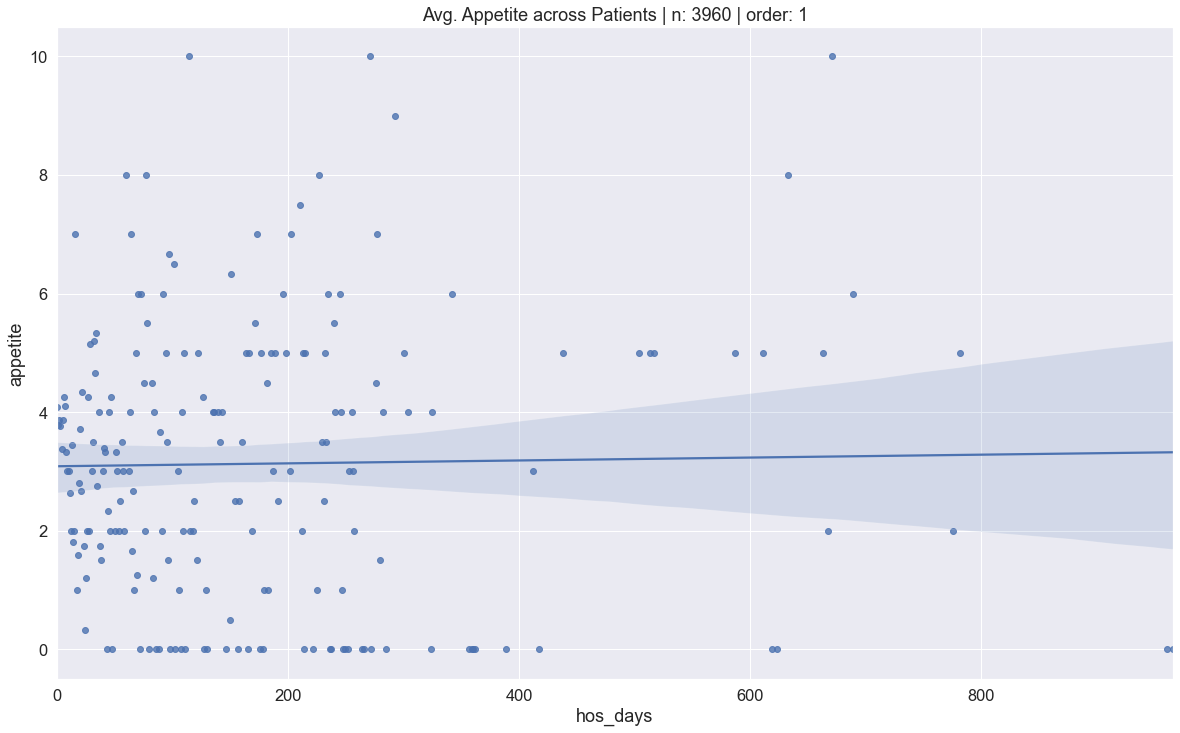

In [105]:
ax = plt.axes()
sns.regplot(x='hos_days', y='appetite', data=df_a1, ax=ax, order=1)
ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 1')
plt.show()

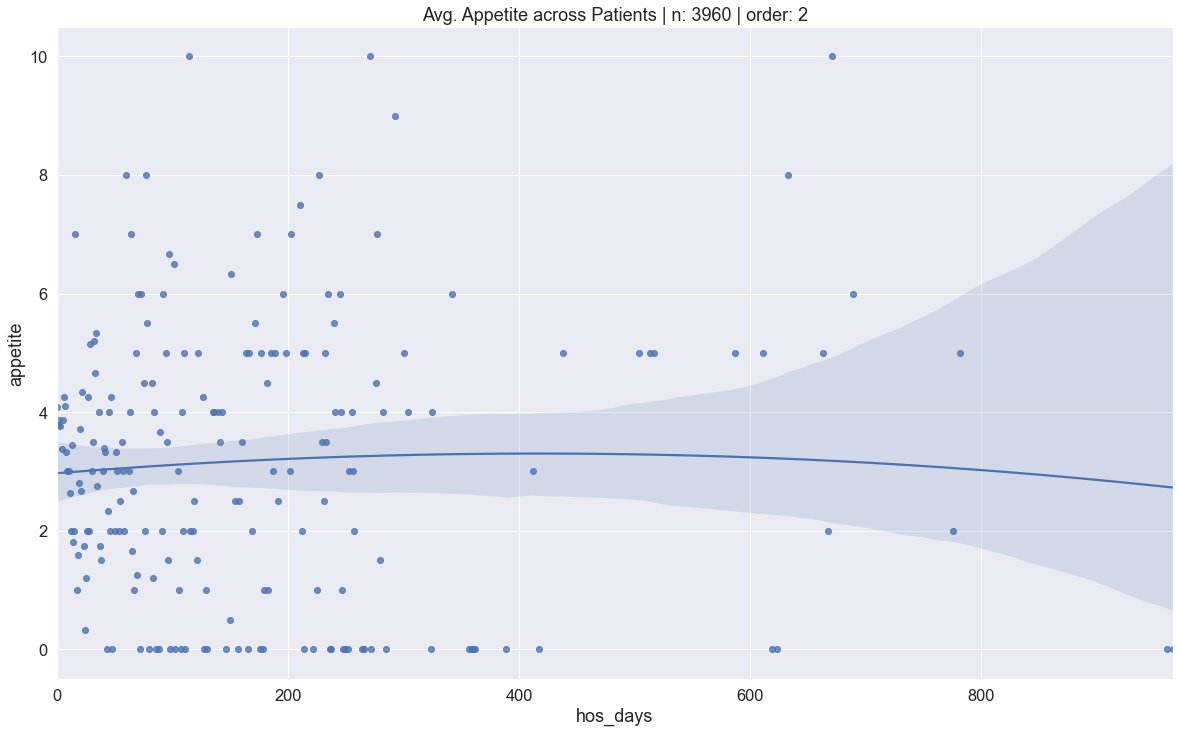

In [106]:
ax = plt.axes()
sns.regplot(x='hos_days', y='appetite', data=df_a1, ax=ax, order=2)
ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 2')
plt.show()

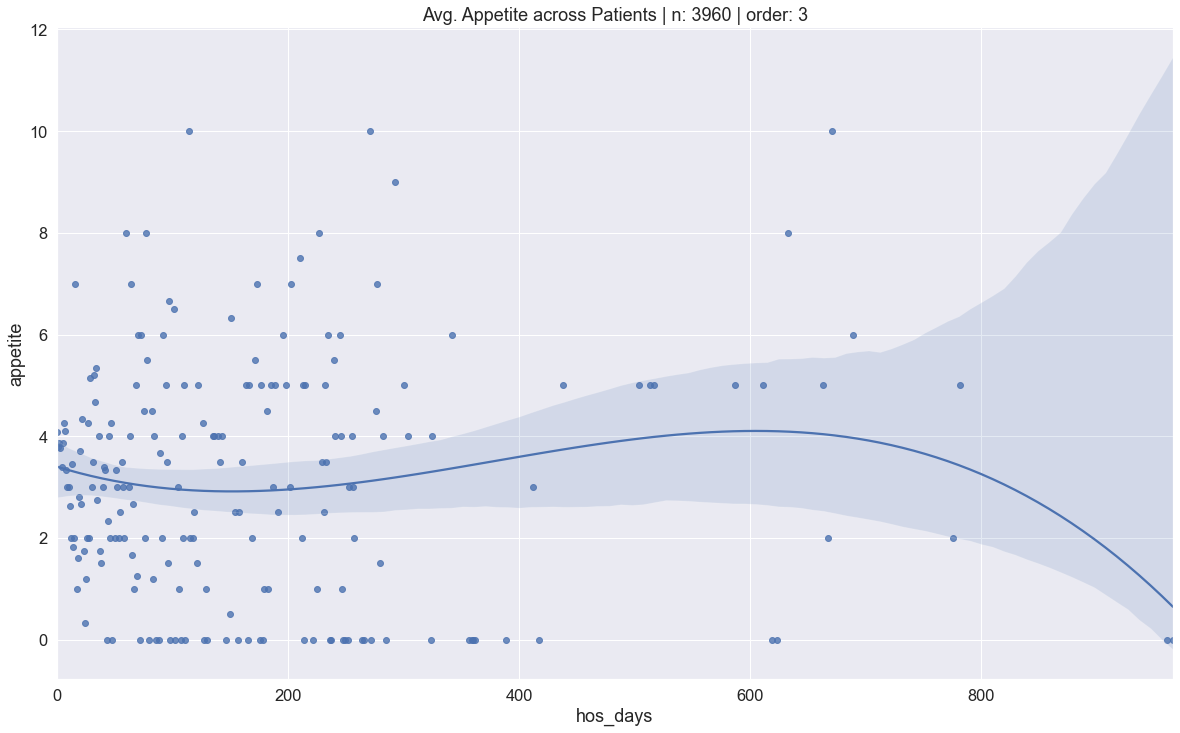

In [107]:
ax = plt.axes()
sns.regplot(x='hos_days', y='appetite', data=df_a1, ax=ax, order=3)
ax.set_title('Avg. Appetite across Patients | n: ' + str(len(df_aa.IDEHR.unique())) + ' | order: 3')
plt.show()

In [108]:
# appetite of patients surviving atleast x days
s_time = 60
df_a2 = df_aa[df_aa['survival_time_days'] >= s_time]
df_a2 = df_a2[df_a2['hos_days'] <= s_time]
p_num = len(df_a2.IDEHR.unique())
df_a2 = df_a2[['hos_days', 'appetite']].groupby(by=['hos_days']).mean().reset_index()

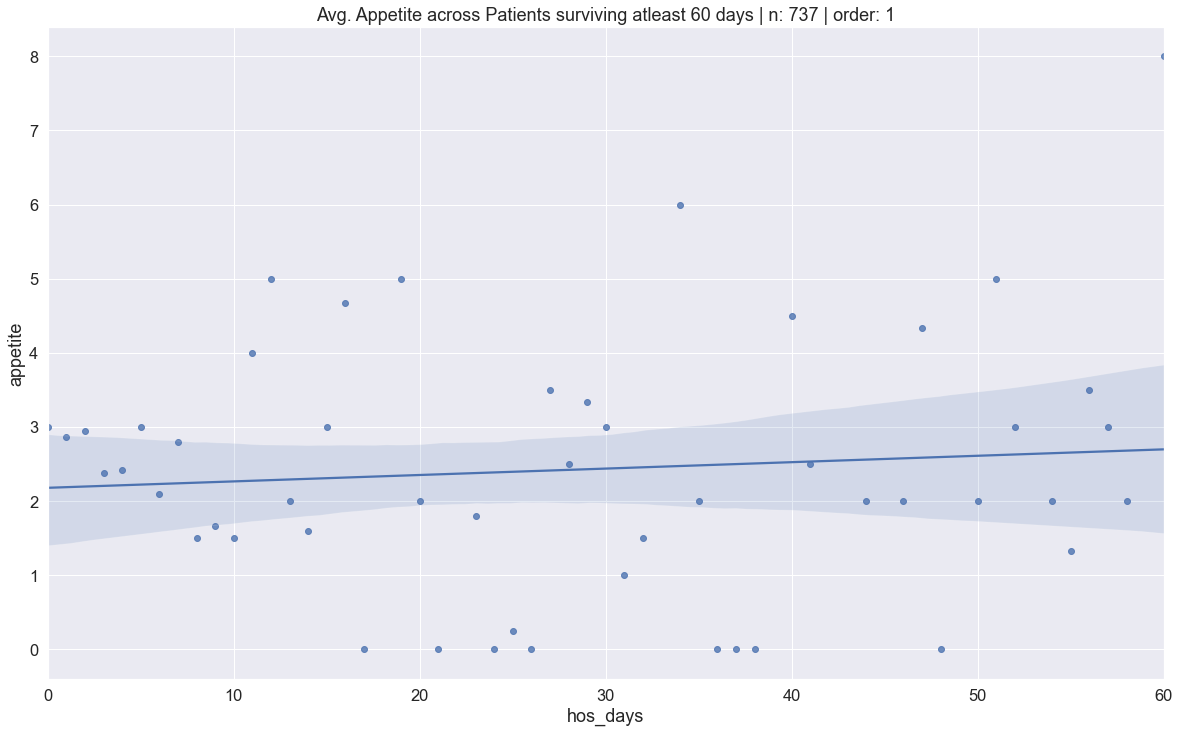

In [109]:
ax = plt.axes()
sns.regplot(x='hos_days', y='appetite', data=df_a2, ax=ax, order=1)
ax.set_title('Avg. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
plt.show()

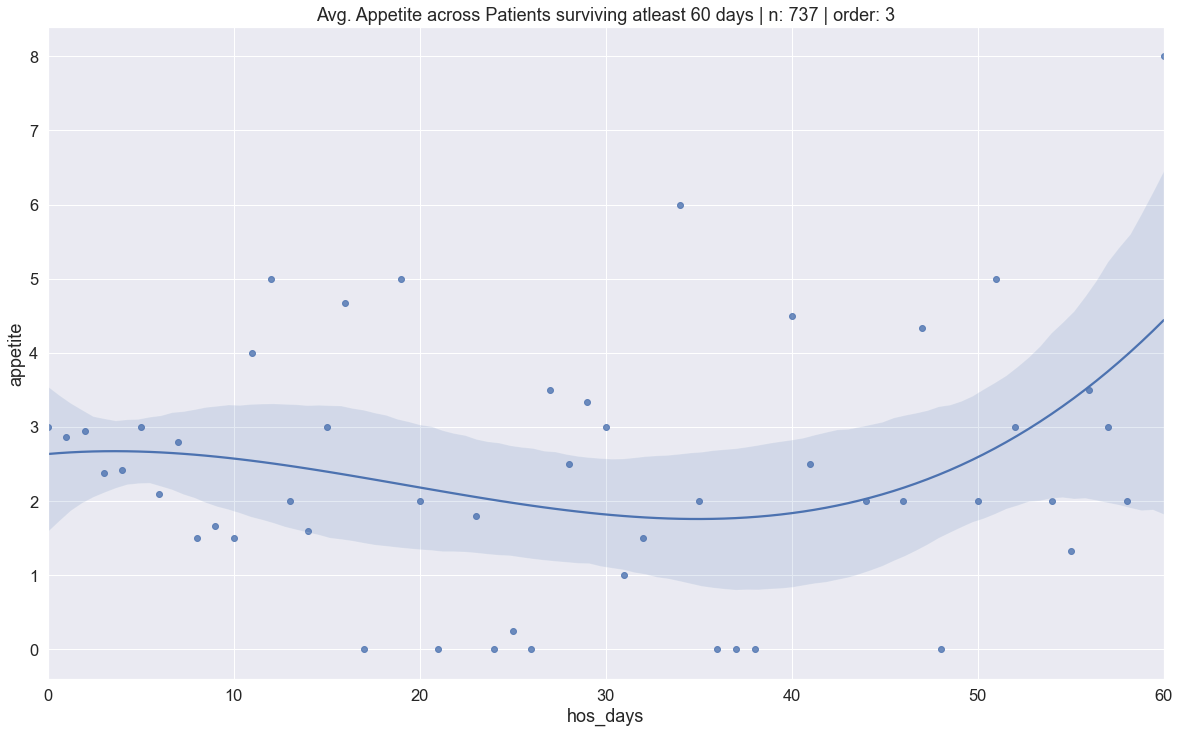

In [110]:
ax = plt.axes()
sns.regplot(x='hos_days', y='appetite', data=df_a2, ax=ax, order=3)
ax.set_title('Avg. Appetite across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 3')
plt.show()

In [111]:
# appetite split by EHRType
df_a3 = df_aa[['hos_days', 'EHRType', 'appetite']].groupby(by=['EHRType', 'hos_days']).mean().reset_index()
df_a3

,EHRType,hos_days,appetite
0,AMB,0,4.095582
1,AMB,1,3.692698
2,AMB,2,3.891945
3,AMB,3,3.746518
4,AMB,4,3.366013
...,...,...,...
219,EHR,23,0.000000
220,EHR,29,3.000000
221,EHR,55,3.000000
222,EHR,58,2.000000


Text(0.5, 0.98, 'Avg. Appetite across Patients by EHRType | n (EHR): 631 | n (AMB): 3374 | order: 2')

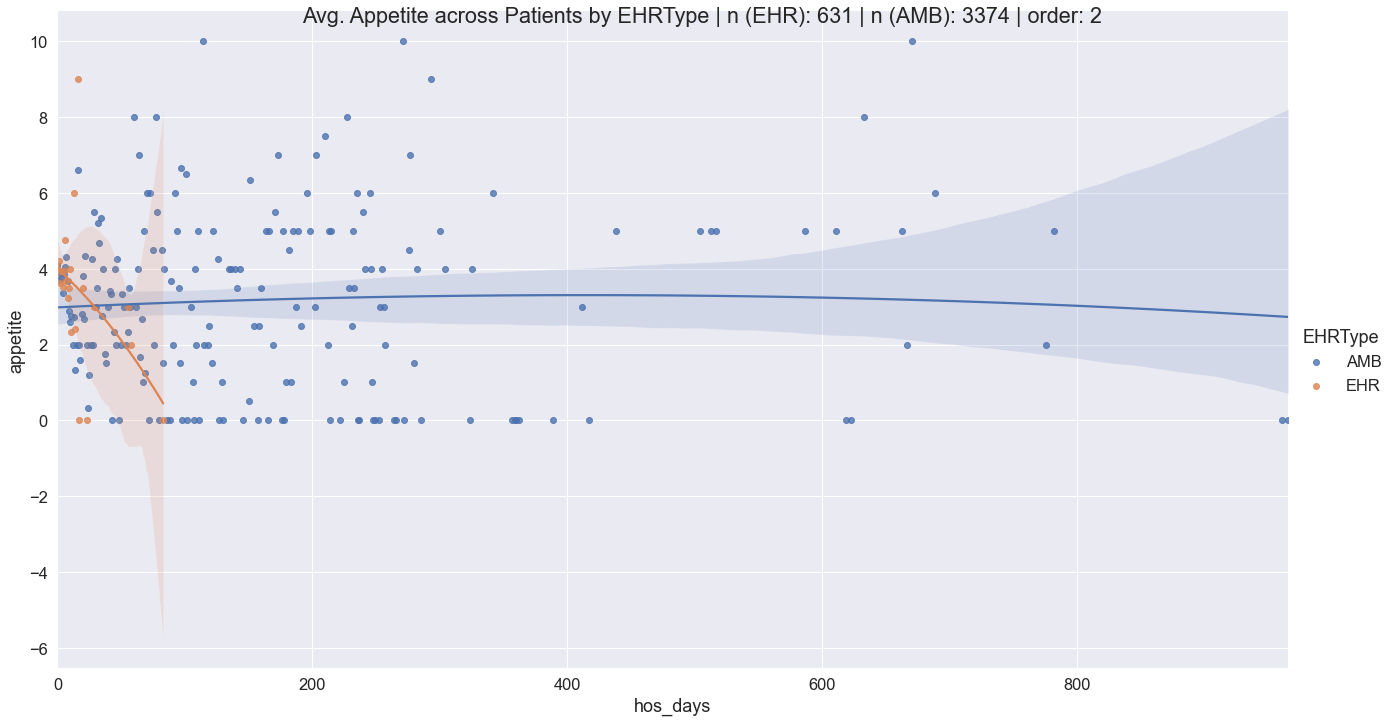

In [112]:
e_num = len(df_aa[df_aa['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_aa[df_aa['EHRType'] == 'AMB'].IDEHR.unique())
sns.lmplot(x='hos_days', y='appetite', hue='EHRType', data=df_a3, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 2')

In [113]:
# appetite split by EHRType for first 100 days
df_a3 = df_a3[df_a3['hos_days'] <= 100]
df_a3

,EHRType,hos_days,appetite
0,AMB,0,4.095582
1,AMB,1,3.692698
2,AMB,2,3.891945
3,AMB,3,3.746518
4,AMB,4,3.366013
...,...,...,...
219,EHR,23,0.000000
220,EHR,29,3.000000
221,EHR,55,3.000000
222,EHR,58,2.000000


Text(0.5, 0.98, 'Avg. Appetite across Patients by EHRType | n (EHR): 631 | n (AMB): 3355 | order: 2')

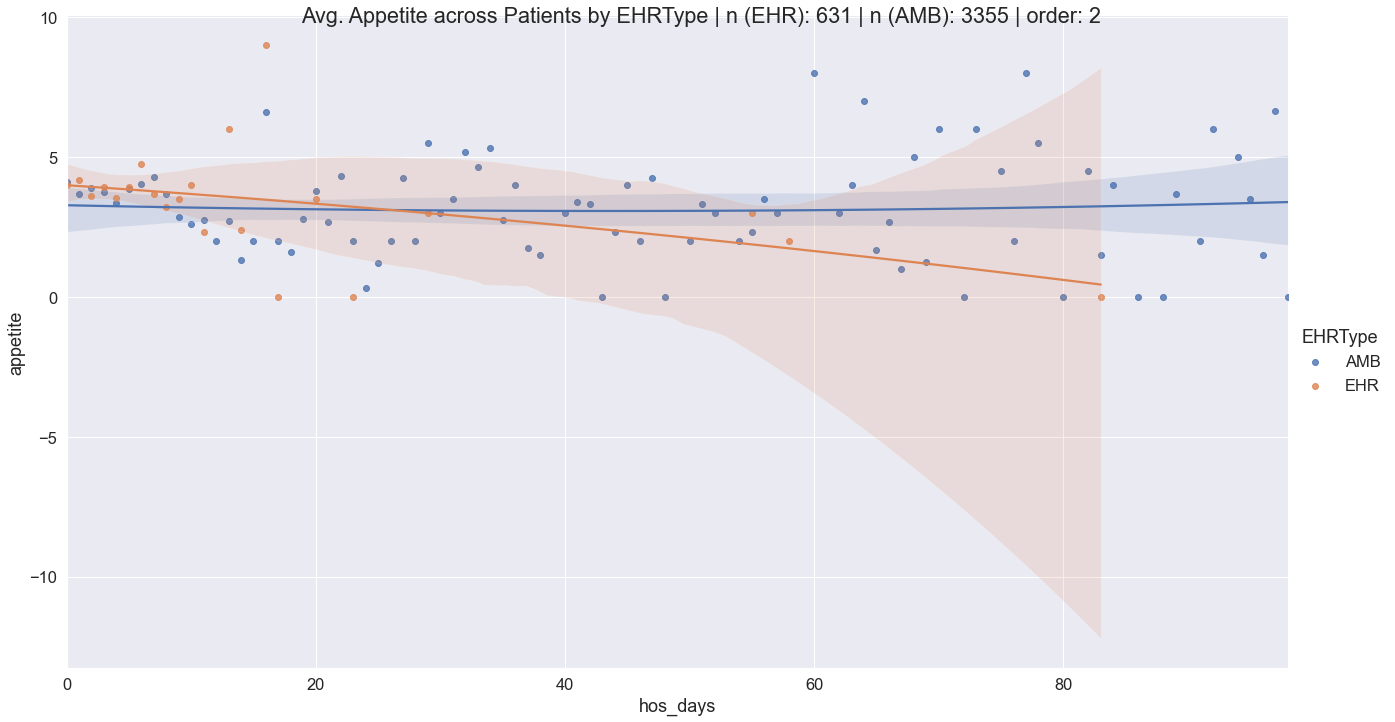

In [114]:
dft = df_aa[df_aa['hos_days'] <= 100]
e_num = len(dft[dft['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(dft[dft['EHRType'] == 'AMB'].IDEHR.unique())
sns.lmplot(x='hos_days', y='appetite', hue='EHRType', data=df_a3, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 2')

In [115]:
# appetite split by setting
print(len(df_aa.IDEHR.unique()))
df_set = pd.read_excel('./vidas_data/IDEHR-EHRType-OU.xlsx')
df_set = df_set.rename(columns={"UO (Setting)\n": 'Setting'})
df_st = pd.merge(df_aa, df_set, on=['IDEHR', 'EHRType'])
print(len(df_st.IDEHR.unique()))
df_st

3960
3960


,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,appetite,hos_days,PatientID,Setting
0,1489,2015-12-27 03:00:00,AMB,2015-04-21 03:36:25.613,249.0,Palliative (Non-Malignant),586,2015-12-10 12:31:32.910,0.0,233,192,Domicilio
1,1760,2016-01-12 07:30:00,AMB,2015-04-16 21:20:34.270,270.0,Palliative (Non-Malignant),1,2015-04-21 19:28:37.870,1.0,4,284,Domicilio
2,1994,2016-07-09 20:00:00,AMB,2015-04-15 22:42:22.550,450.0,Cervical-Ovarian,1830,2015-11-27 20:13:44.800,1.0,225,20379,Domicilio
3,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-01 13:46:03.970,2.0,28,30711,Domicilio
4,2833,2015-12-09 13:30:00,AMB,2015-09-02 17:04:00.623,97.0,GI Tract,1533,2015-10-08 14:46:07.657,2.0,35,30711,Domicilio
...,...,...,...,...,...,...,...,...,...,...,...,...
4403,29398,2020-07-21 19:30:57,AMB,2020-07-17 09:37:05.790,4.0,Breast,1749,2020-07-21 11:54:38.257,4.0,4,59879,Domicilio
4404,29399,2020-07-23 00:00:21,AMB,2020-07-17 10:08:54.310,5.0,Lung,1630,2020-07-20 12:47:13.370,4.0,3,59878,Domicilio
4405,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 19:00:04.973,1.0,0,59898,Domicilio
4406,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-22 18:09:50.193,1.0,5,59898,Domicilio


In [116]:
df_a4 = df_st[['Setting', 'hos_days', 'appetite']].groupby(by=['Setting', 'hos_days']).mean().reset_index()
df_st[['Setting', 'survival_time_days', 'hos_days']].groupby(by=['Setting']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                    hos_days       \
                                   amin    amax       mean     amin amax   
Setting                                                                    
Domicilio                           0.0  1416.0  61.517324        0  966   
Domicilio Pediatrico                3.0   165.0  71.000000        1   31   
Hospice                             0.0   135.0  15.016949        0   83   
Hospice Pediatrico                 23.0    23.0  23.000000        1    1   

                                 
                           mean  
Setting                          
Domicilio             14.112207  
Domicilio Pediatrico   8.333333  
Hospice                2.078582  
Hospice Pediatrico     1.000000

In [117]:
df_a4[df_a4['Setting'] == 'Hospice Pediatrico'] = np.nan
df_a4[df_a4['Setting'] == 'Domicilio Pediatrico'] = np.nan
df_a4 = df_a4.dropna()

Text(0.5, 0.98, 'Avg. Appetite across Patients by Setting | n (D): 3368 | n (H): 630 | order: 2')

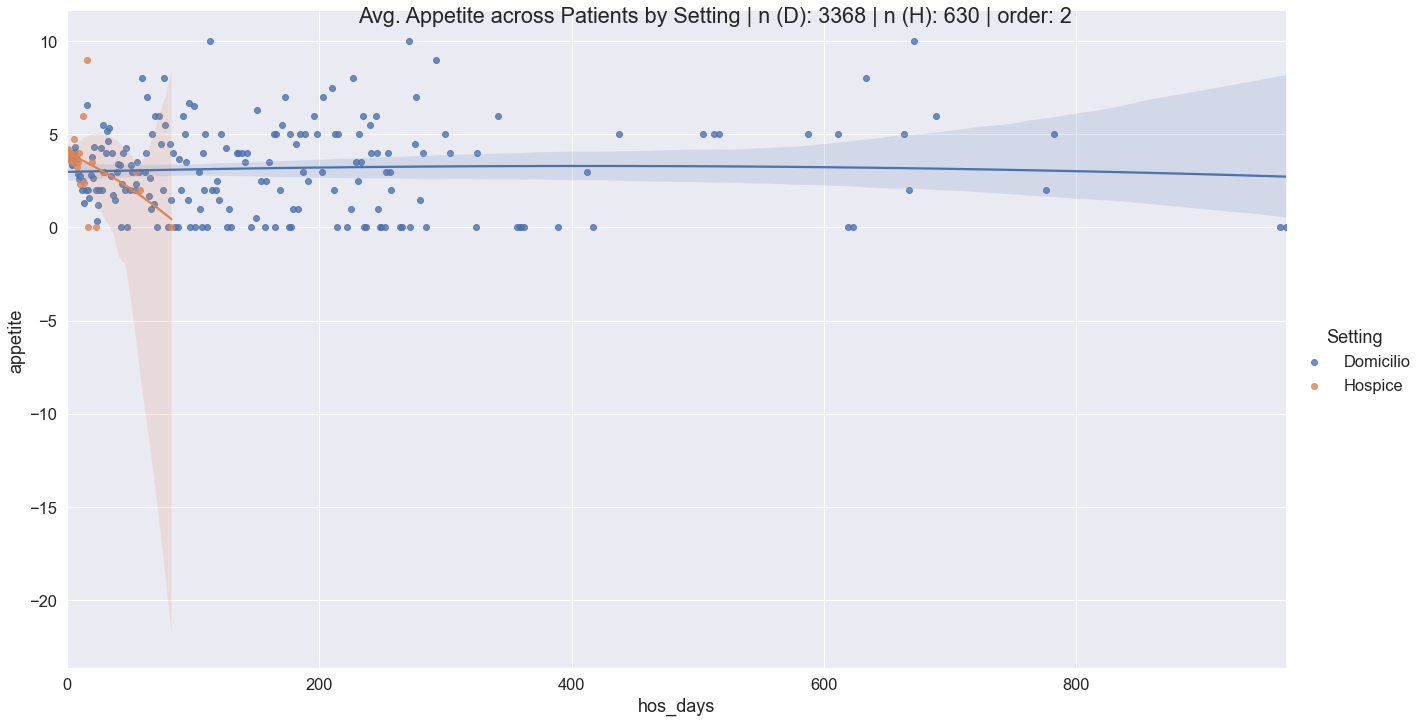

In [118]:
d_num = len(df_st[df_st['Setting'] == 'Domicilio'].IDEHR.unique())
dp_num = len(df_st[df_st['Setting'] == 'Domicilio Pediatrico'].IDEHR.unique())
h_num = len(df_st[df_st['Setting'] == 'Hospice'].IDEHR.unique())
hp_num = len(df_st[df_st['Setting'] == 'Hospice Pediatrico'].IDEHR.unique())
sns.lmplot(x='hos_days', y='appetite', hue='Setting', data=df_a4, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 2')

Text(0.5, 0.98, 'Avg. Appetite across Patients by Setting | n (D): 3368 | n (H): 630 | order: 2')

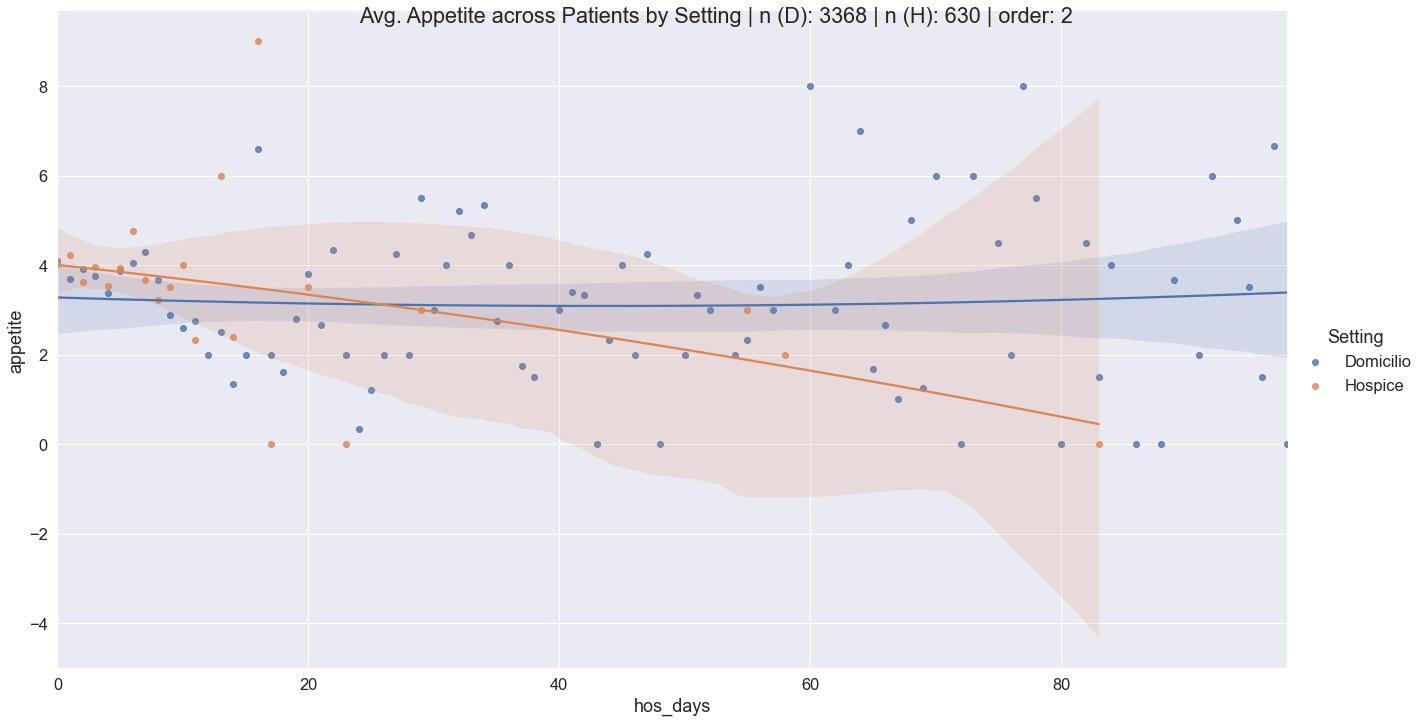

In [119]:
df_a5 = df_a4[df_a4['hos_days'] <= 100]
sns.lmplot(x='hos_days', y='appetite', hue='Setting', data=df_a5, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Appetite across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 2')

In [120]:
# average appetite across Diagnosis
df_a6 = df_aa[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 100]
p_num = len(df_aa[df_aa['hos_days'] <= 100].IDEHR.unique())
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,...,86,88,89,91,92,94,95,96,97,98
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc,2.215686,1.822222,1.777778,2.600000,1.111111,1.666667,3.000000,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Breast,3.415254,3.987179,3.000000,3.566667,3.307692,3.285714,4.333333,2.000000,1.5,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cervical-Ovarian,4.000000,3.307692,4.233333,3.296296,3.928571,3.666667,NaN,8.000000,6.0,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
GI Tract,4.584746,4.545455,3.909091,4.469880,3.848485,4.416667,4.333333,3.500000,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,7.0,0.0
Genitourinary,4.096386,2.920635,3.724138,2.428571,2.272727,3.000000,8.500000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
Head-Neck,3.285714,3.115385,3.909091,4.750000,5.333333,8.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
Liver-Biliary,4.194444,4.333333,4.342857,4.120000,4.333333,5.250000,3.000000,4.500000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
Lung,3.633987,3.417293,3.727273,3.517647,2.620690,4.000000,4.200000,3.285714,2.0,1.0,...,0.0,NaN,NaN,2.0,NaN,5.0,2.0,NaN,NaN,NaN
Lymphoid_Leukemia,4.500000,3.500000,2.000000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


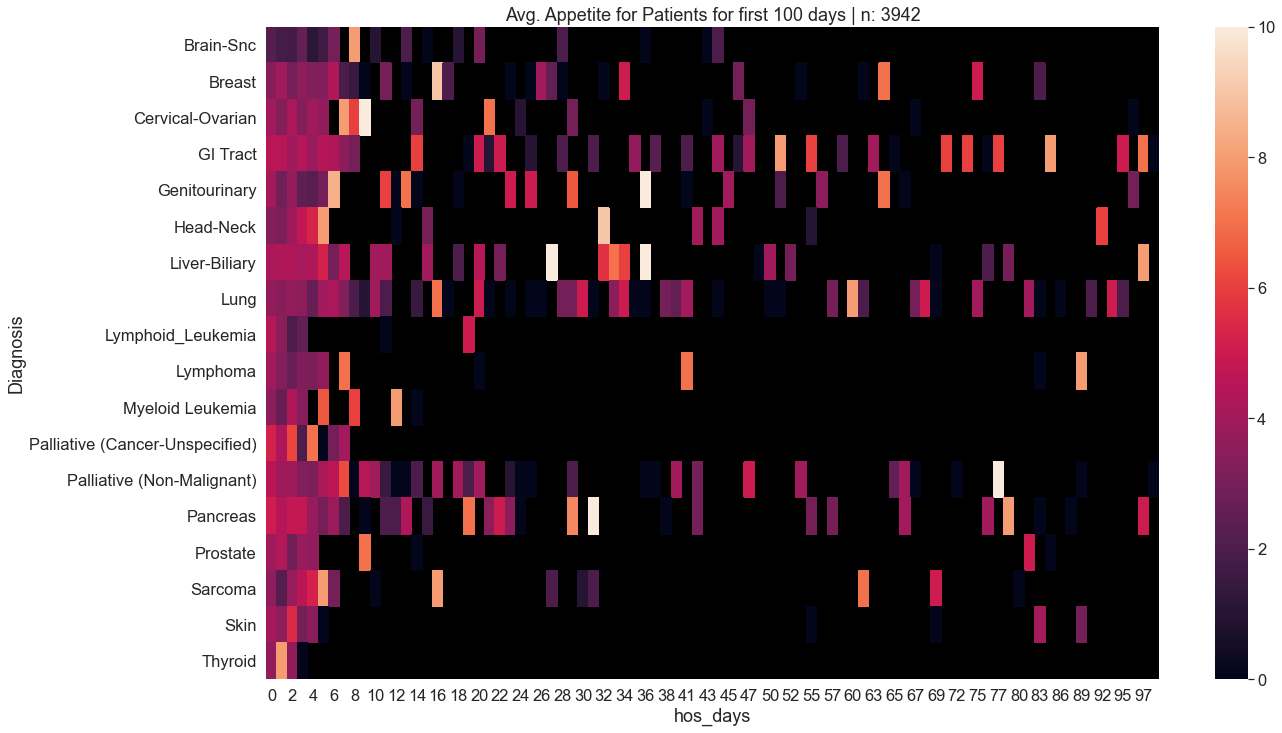

In [121]:
ax = plt.axes()
sns.heatmap(df_a6, annot=False, fmt='g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Appetite for Patients for first 100 days | n: ' + str(p_num))
plt.show()

In [122]:
df_a6 = df_aa[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 15]
p_num = len(df_aa[df_aa['hos_days'] <= 15].IDEHR.unique())
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Diagnosis,,,,,,,,,,,,,,,,
Brain-Snc,2.215686,1.822222,1.777778,2.600000,1.111111,1.666667,3.000000,NaN,8.0,NaN,1.0,NaN,NaN,2.000000,NaN,0.0
Breast,3.415254,3.987179,3.000000,3.566667,3.307692,3.285714,4.333333,2.000000,1.5,0.0,NaN,3.0,NaN,0.000000,NaN,NaN
Cervical-Ovarian,4.000000,3.307692,4.233333,3.296296,3.928571,3.666667,NaN,8.000000,6.0,10.0,NaN,NaN,NaN,NaN,3.0,NaN
GI Tract,4.584746,4.545455,3.909091,4.469880,3.848485,4.416667,4.333333,3.500000,3.0,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Genitourinary,4.096386,2.920635,3.724138,2.428571,2.272727,3.000000,8.500000,NaN,NaN,NaN,NaN,6.0,0.0,7.000000,0.0,NaN
Head-Neck,3.285714,3.115385,3.909091,4.750000,5.333333,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
Liver-Biliary,4.194444,4.333333,4.342857,4.120000,4.333333,5.250000,3.000000,4.500000,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0
Lung,3.633987,3.417293,3.727273,3.517647,2.620690,4.000000,4.200000,3.285714,2.0,1.0,4.0,2.0,NaN,NaN,1.5,NaN
Lymphoid_Leukemia,4.500000,3.500000,2.000000,2.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


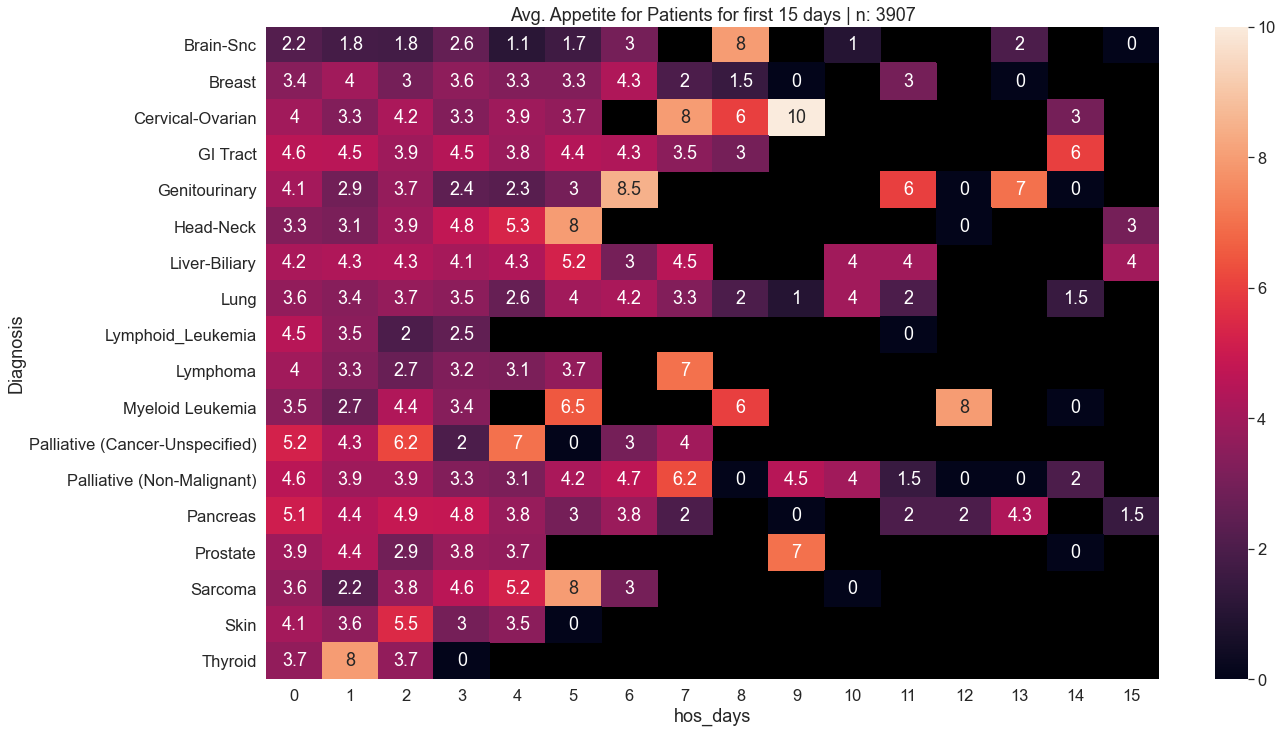

In [123]:
ax = plt.axes()
sns.heatmap(df_a6, annot=True, fmt='.2g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Appetite for Patients for first 15 days | n: ' + str(p_num))
plt.show()

In [124]:
s_time = 15
df_a6 = df_aa[df_aa['survival_time_days'] >= 15 ]
df_a6 = df_a6[df_a6['hos_days'] <= 15]
p_num = len(df_a6.IDEHR.unique())
df_a6 = df_a6[['Diagnosis', 'hos_days', 'appetite']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_a6 = df_a6[df_a6['hos_days'] <= 15]
df_a6 = df_a6.pivot(index='Diagnosis', columns='hos_days', values='appetite')
df_a6

hos_days,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Diagnosis,,,,,,,,,,,,,,,,
Brain-Snc,1.162162,1.129032,1.882353,1.400000,1.111111,1.666667,3.000000,NaN,NaN,NaN,1.0,NaN,NaN,2.000000,NaN,0.0
Breast,2.646154,3.847826,2.952381,2.937500,3.100000,2.400000,5.500000,2.0,3.0,0.000000,NaN,3.0,NaN,0.000000,NaN,NaN
Cervical-Ovarian,3.242424,2.413793,4.055556,2.863636,2.555556,4.000000,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN
GI Tract,3.729927,3.931034,3.666667,3.982143,3.400000,4.090909,3.600000,3.5,1.5,NaN,NaN,NaN,NaN,NaN,6.0,NaN
Genitourinary,3.063830,2.725000,2.833333,2.461538,1.800000,3.250000,NaN,NaN,NaN,NaN,NaN,6.0,0.0,7.000000,0.0,NaN
Head-Neck,2.785714,3.312500,3.909091,2.600000,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,3.0
Liver-Biliary,3.137931,3.755556,3.142857,4.142857,4.750000,5.200000,3.000000,3.0,NaN,NaN,4.0,4.0,NaN,NaN,NaN,4.0
Lung,3.012346,2.961538,3.202247,2.750000,2.315789,2.857143,3.500000,1.5,2.0,0.666667,4.0,2.0,NaN,NaN,1.5,NaN
Lymphoid_Leukemia,0.000000,1.333333,2.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


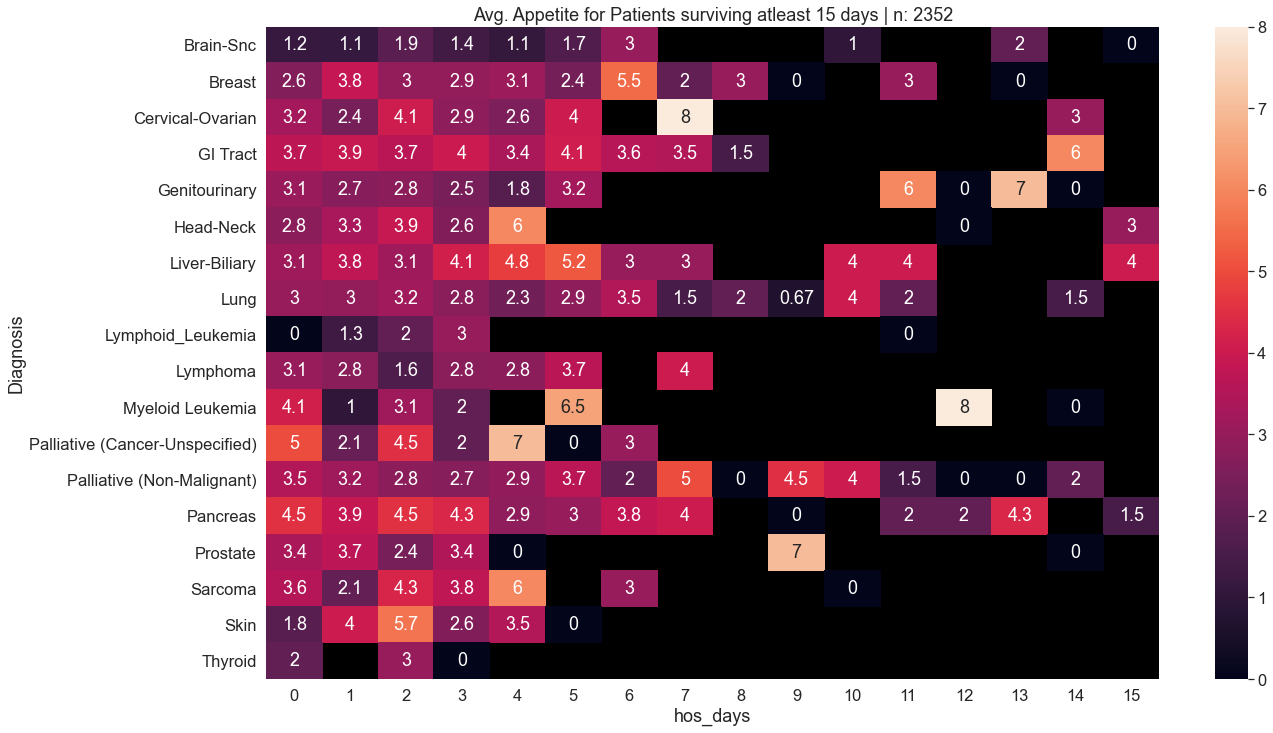

In [125]:
ax = plt.axes()
sns.heatmap(df_a6, annot=True, fmt='.2g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Appetite for Patients surviving atleast 15 days | n: ' + str(p_num))
plt.show()

In [126]:
# nausea plots
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,controlled,0
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,controlled,1
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,controlled,3
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,controlled,5
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,controlled,6
...,...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,occasional,1
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,occasional,4
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,occasional,7
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,occasional,0


In [127]:
df_na.loc[df_na['nausea'] == 'persistent', 'nausea'] = 10.0
df_na.loc[df_na['nausea'] == 'controlled', 'nausea'] = 3.3
df_na.loc[df_na['nausea'] == 'occasional', 'nausea'] = 6.7

C:\Users\prate\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [128]:
df_na.nausea.value_counts()

6.7     5182
3.3     1740
10.0    1443
Name: nausea, dtype: int64

In [129]:
df_na['nausea'] = pd.to_numeric(df_na.nausea, errors='coerce')

<ipython-input-129-f439dfa3466b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['nausea'] = pd.to_numeric(df_na.nausea, errors='coerce')


In [130]:
df_na

,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,3.3,0
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,3.3,1
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,3.3,3
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,3.3,5
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,3.3,6
...,...,...,...,...,...,...,...,...,...,...
8395,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,6.7,1
8396,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,6.7,4
8397,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,6.7,7
8398,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,6.7,0


In [131]:
df_na.nausea.value_counts()

6.7     5182
3.3     1740
10.0    1443
Name: nausea, dtype: int64

In [132]:
# normalied nausea across all patients
df_n1 = df_na[['hos_days', 'nausea']].groupby(by=['hos_days']).mean().reset_index()
df_n1

,hos_days,nausea
0,0,7.330445
1,1,7.076392
2,2,6.900940
3,3,6.830449
4,4,6.924125
...,...,...
413,996,6.700000
414,1003,6.700000
415,1010,6.700000
416,1017,6.700000


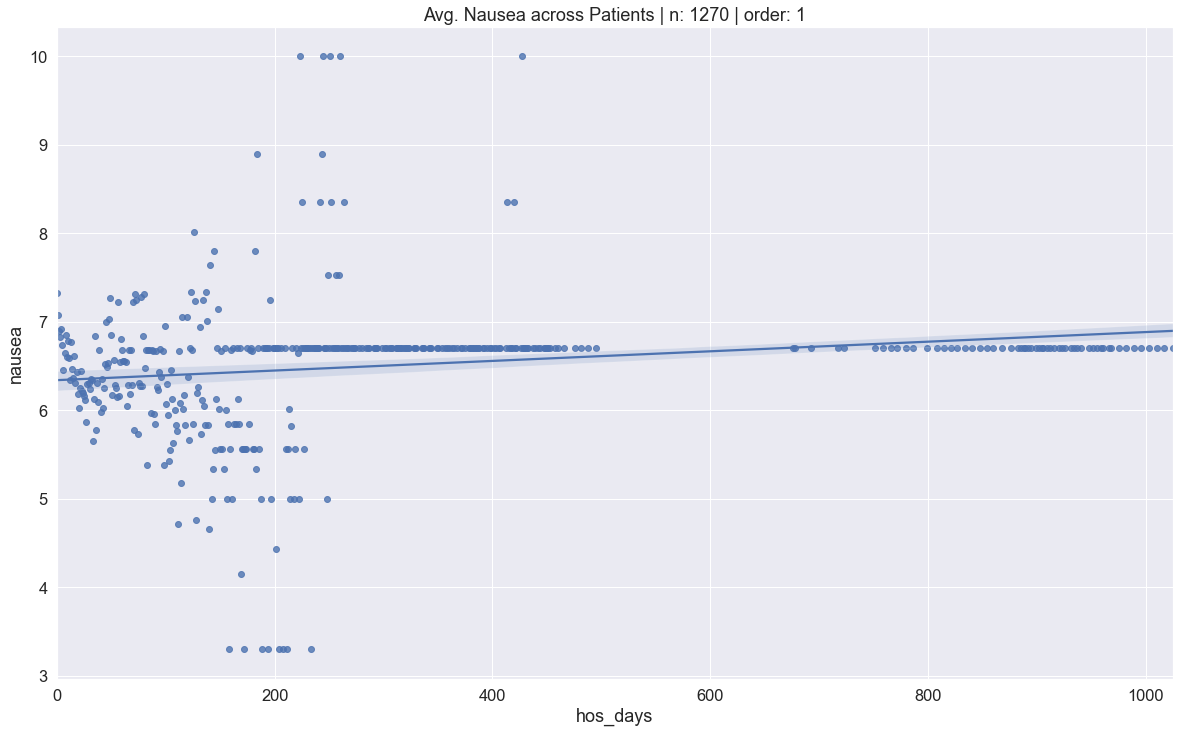

In [133]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=1)
ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 1')
plt.show()

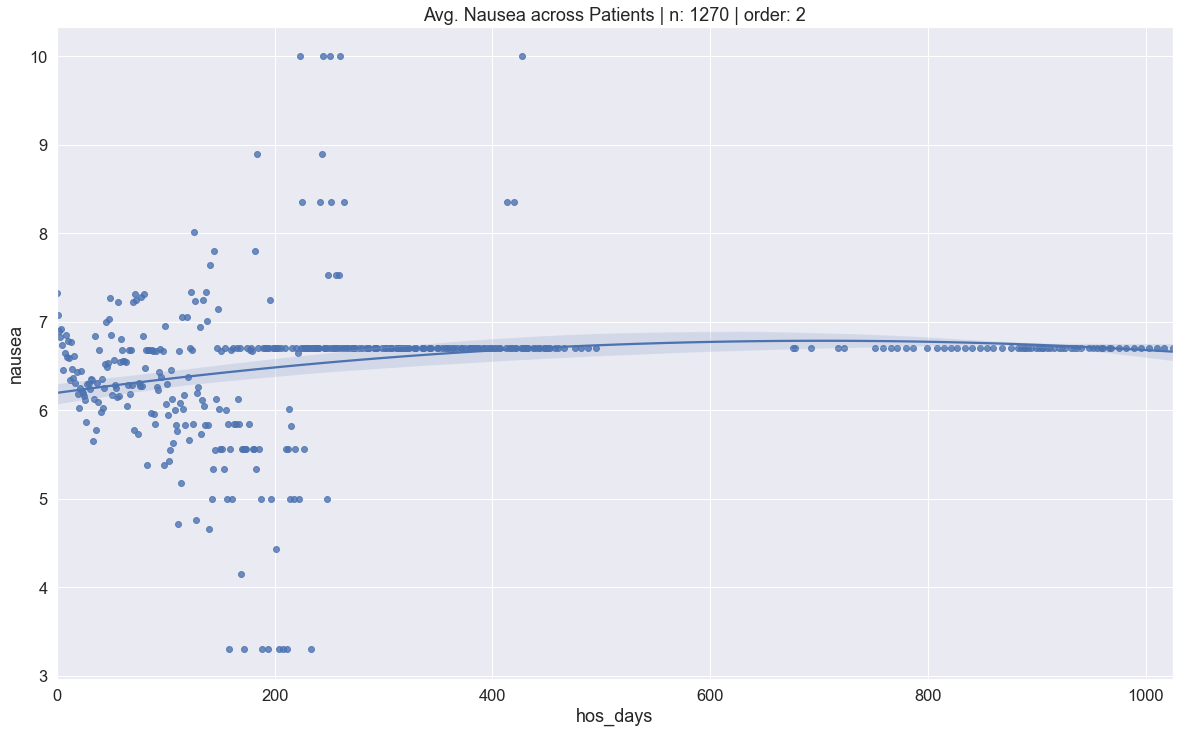

In [134]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=2)
ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 2')
plt.show()

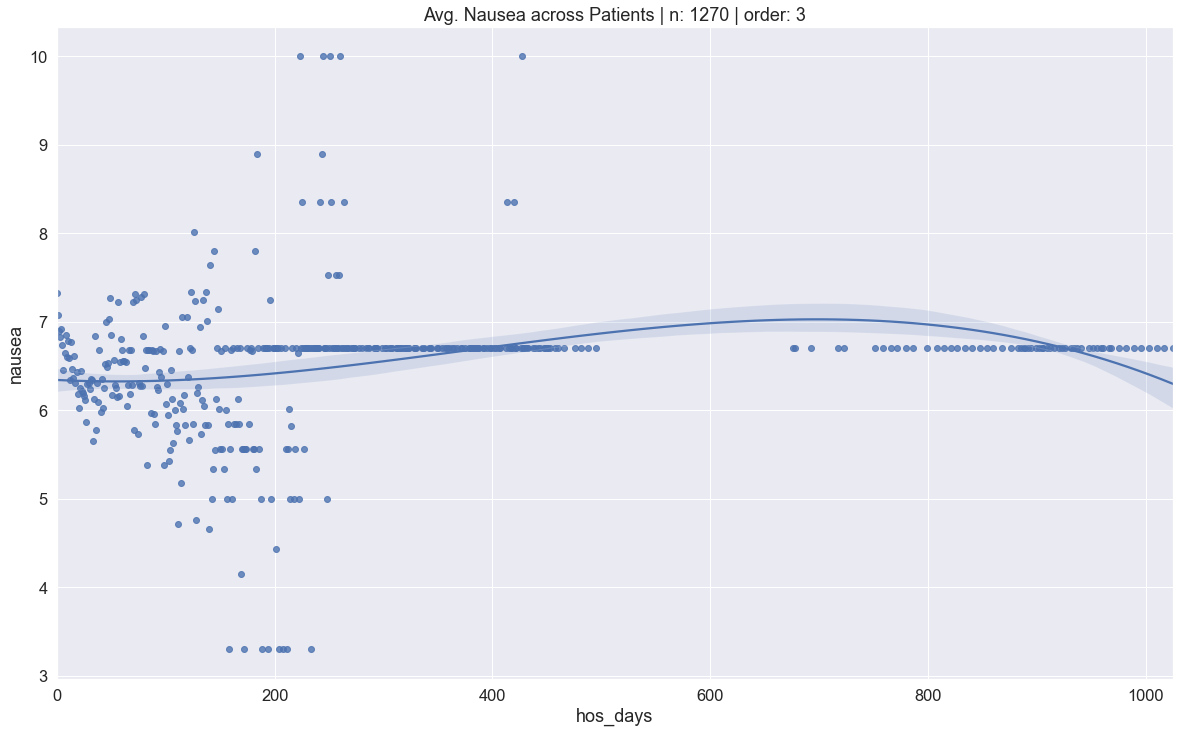

In [135]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=3)
ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 3')
plt.show()

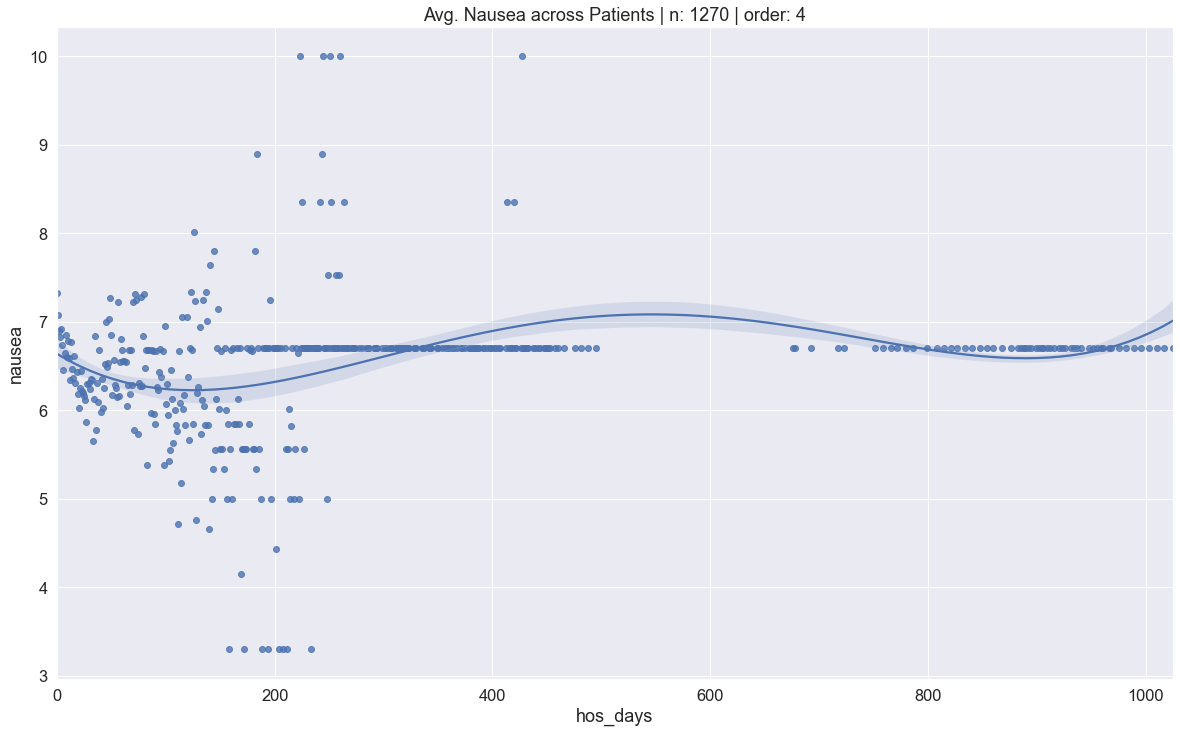

In [136]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n1, ax=ax, order=4)
ax.set_title('Avg. Nausea across Patients | n: ' + str(len(df_na.IDEHR.unique())) + ' | order: 4')
plt.show()

In [137]:
# pain relief of patients surviving atleast x days
s_time = 30
df_n2 = df_na[df_na['survival_time_days'] >= s_time]
df_n2 = df_n2[df_n2['hos_days'] <= s_time]
p_num = len(df_n2.IDEHR.unique())
df_n2 = df_n2[['hos_days', 'nausea']].groupby(by=['hos_days']).mean().reset_index()

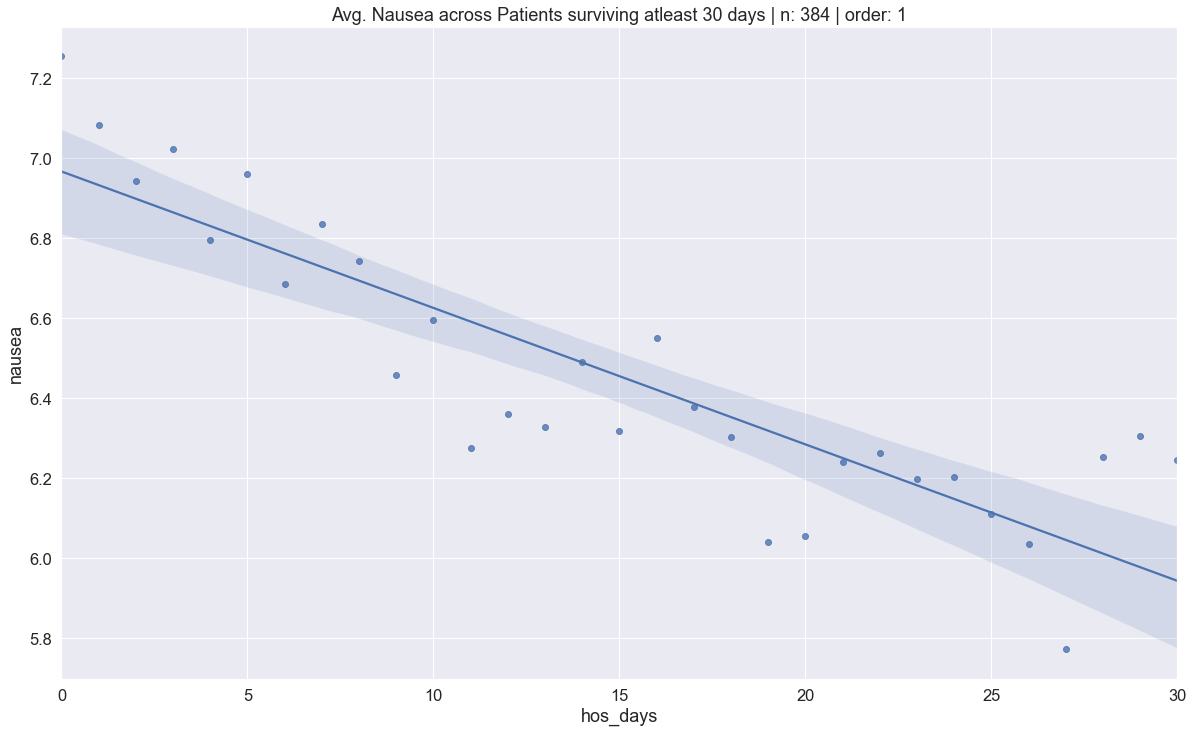

In [138]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n2, ax=ax, order=1)
ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
plt.show()

In [139]:
# pain relief of patients surviving atleast x days
s_time = 60
df_n2 = df_na[df_na['survival_time_days'] >= s_time]
df_n2 = df_n2[df_n2['hos_days'] <= s_time]
p_num = len(df_n2.IDEHR.unique())
df_n2 = df_n2[['hos_days', 'nausea']].groupby(by=['hos_days']).mean().reset_index()

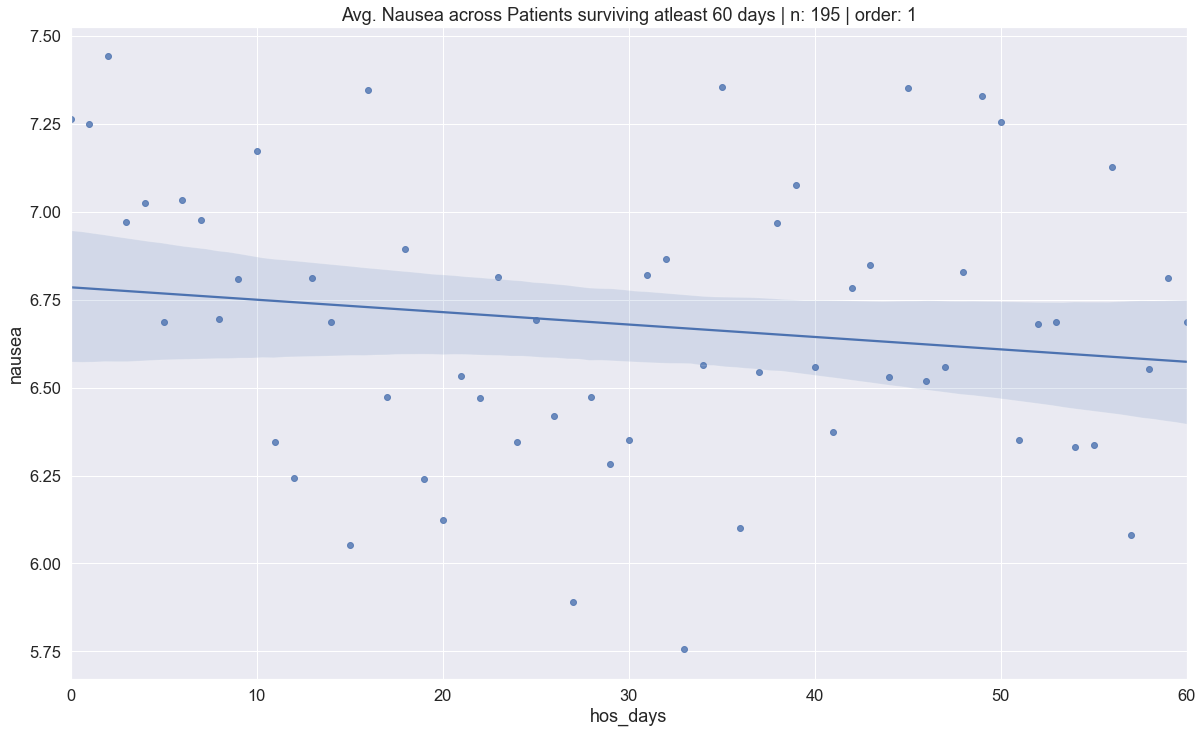

In [140]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n2, ax=ax, order=1)
ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 1')
plt.show()

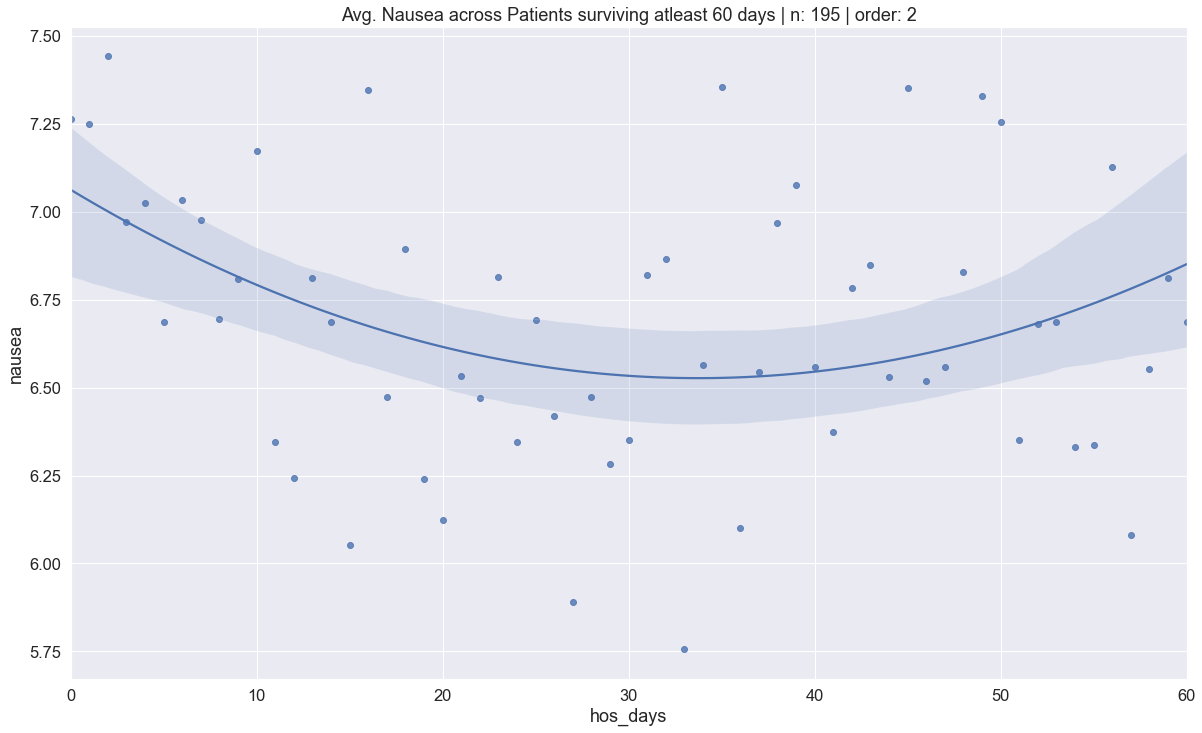

In [141]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n2, ax=ax, order=2)
ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 2')
plt.show()

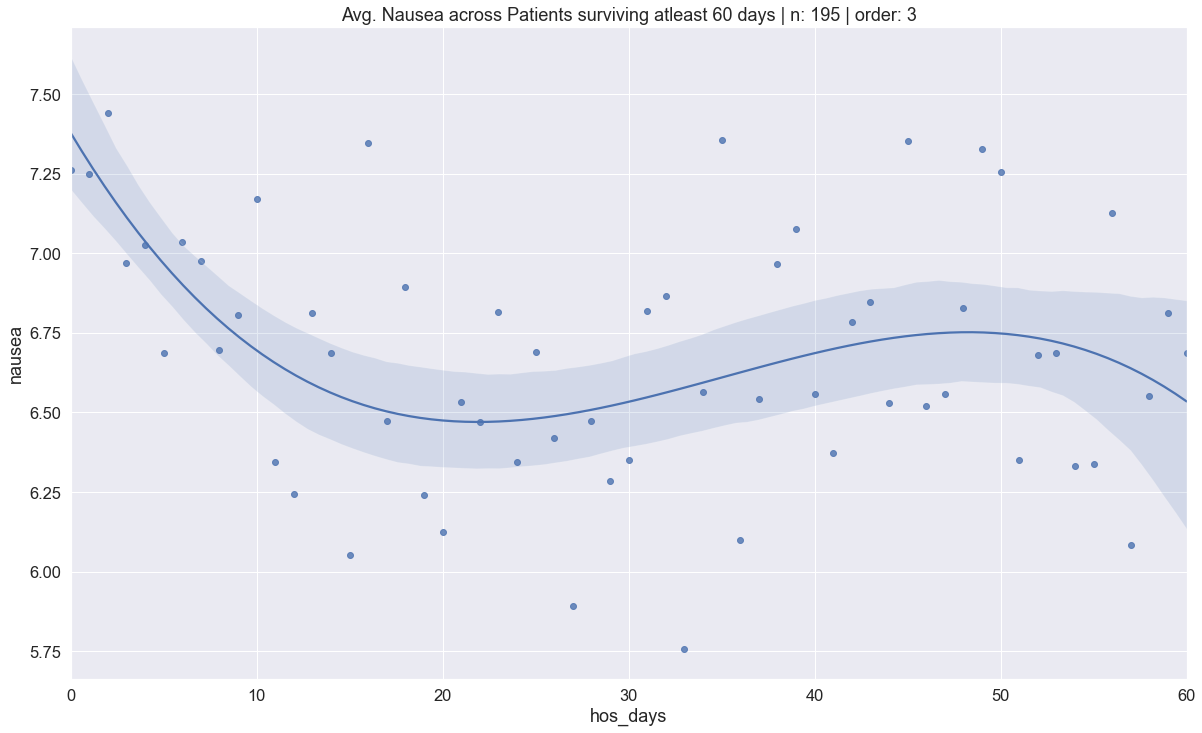

In [142]:
ax = plt.axes()
sns.regplot(x='hos_days', y='nausea', data=df_n2, ax=ax, order=3)
ax.set_title('Avg. Nausea across Patients surviving atleast ' + str(s_time) + ' days | n: ' + str(p_num) + ' | order: 3')
plt.show()

In [143]:
# nausea split by EHRType
df_n3 = df_na[['EHRType', 'hos_days', 'nausea']].groupby(by=['EHRType', 'hos_days']).mean().reset_index()
df_n3

,EHRType,hos_days,nausea
0,AMB,0,7.464074
1,AMB,1,7.470721
2,AMB,2,7.096753
3,AMB,3,7.038272
4,AMB,4,7.016794
...,...,...,...
526,EHR,131,10.000000
527,EHR,135,10.000000
528,EHR,136,10.000000
529,EHR,137,10.000000


Text(0.5, 0.98, 'Avg. Nausea across Patients by EHRType | n (EHR): 335 | n (AMB): 938 | order: 2')

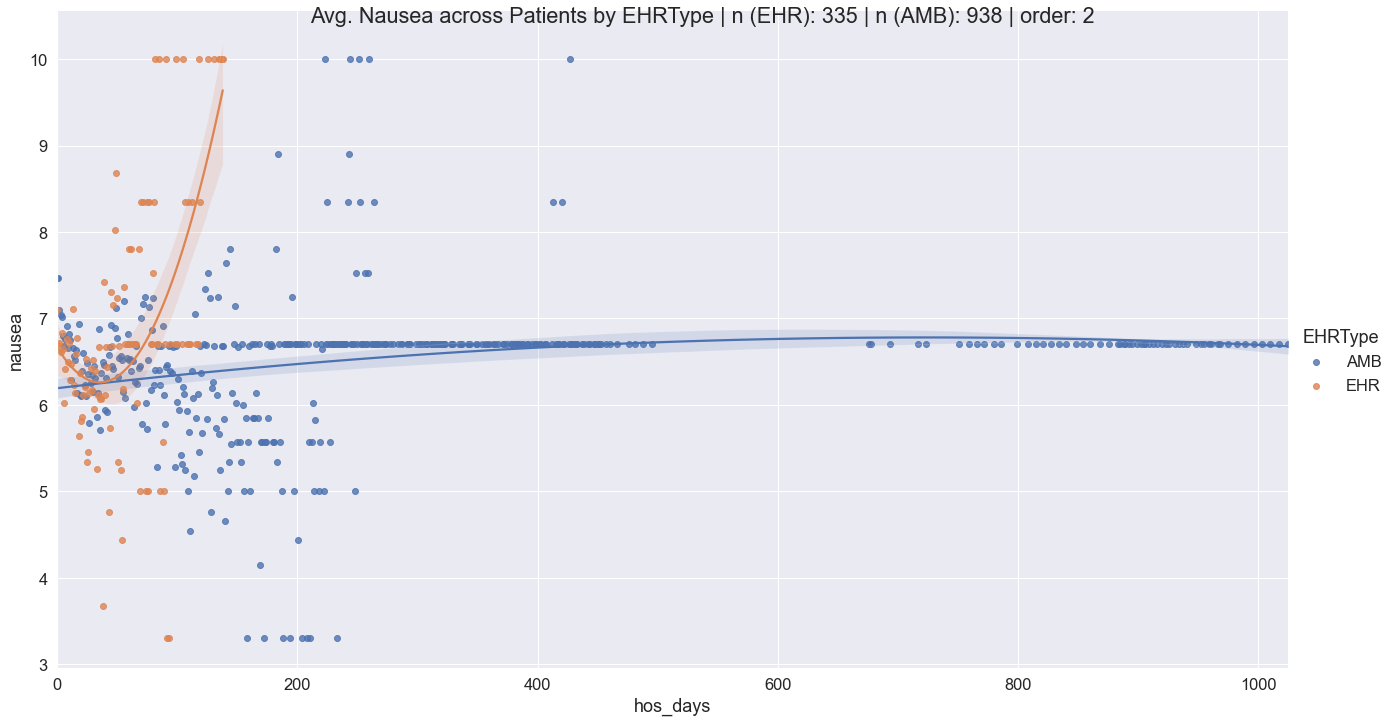

In [144]:
e_num = len(df_na[df_na['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_na[df_na['EHRType'] == 'AMB'].IDEHR.unique())
sns.lmplot(x='hos_days', y='nausea', hue='EHRType', data=df_n3, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 2')

Text(0.5, 0.98, 'Avg. Nausea across Patients by EHRType | n (EHR): 335 | n (AMB): 938 | order: 3')

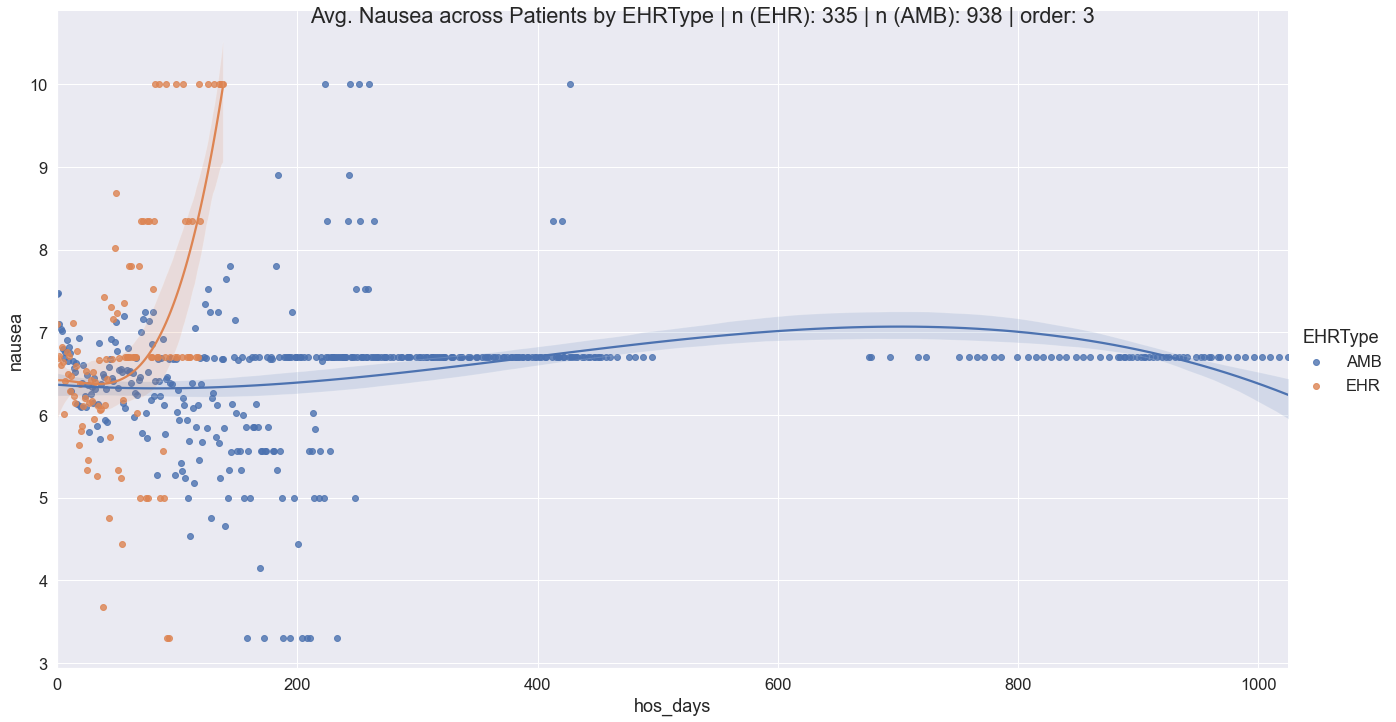

In [145]:
e_num = len(df_na[df_na['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_na[df_na['EHRType'] == 'AMB'].IDEHR.unique())
sns.lmplot(x='hos_days', y='nausea', hue='EHRType', data=df_n3, order=3, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 3')

Text(0.5, 0.98, 'Avg. Nausea across Patients by EHRType | n (EHR): 335 | n (AMB): 938 | order: 4')

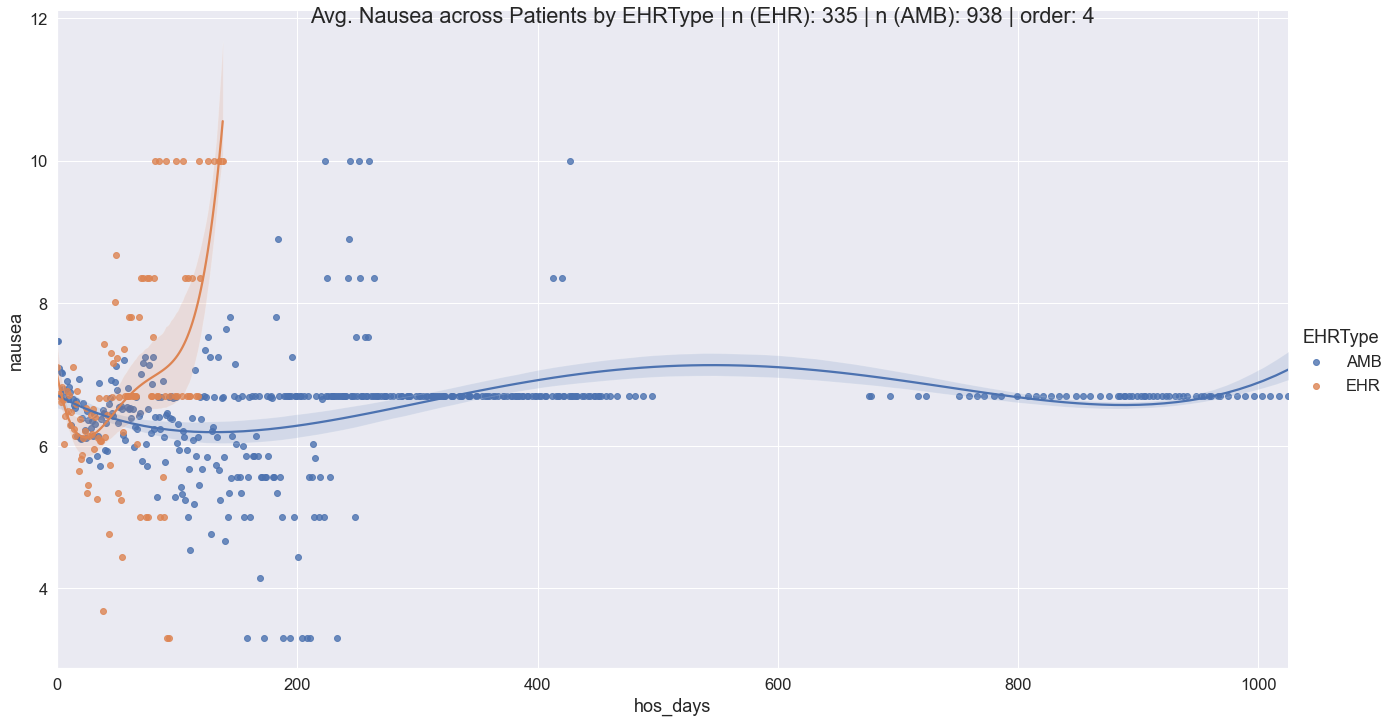

In [146]:
e_num = len(df_na[df_na['EHRType'] == 'EHR'].IDEHR.unique())
a_num = len(df_na[df_na['EHRType'] == 'AMB'].IDEHR.unique())
sns.lmplot(x='hos_days', y='nausea', hue='EHRType', data=df_n3, order=4, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by EHRType | n (EHR): ' + str(e_num) + ' | n (AMB): ' + str(a_num) + ' | order: 4')

In [147]:
df_na[['EHRType', 'survival_time_days', 'hos_days']].groupby(by=['EHRType']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                     hos_days                 
                      amin    amax        mean     amin  amax       mean
EHRType                                                                 
AMB                    0.0  1416.0  112.949411        0  1025  57.432576
EHR                    0.0   139.0   29.001712        0   138  15.718322

In [148]:
# nausea split by setting
print(len(df_na.IDEHR.unique()))
df_set = pd.read_excel('./vidas_data/IDEHR-EHRType-OU.xlsx')
df_set = df_set.rename(columns={"UO (Setting)\n": 'Setting'})
df_st = pd.merge(df_na, df_set, on=['IDEHR', 'EHRType'])
print(len(df_st.IDEHR.unique()))
df_st

1270
1270


,IDEHR,EOH,EHRType,SOH,survival_time_days,Diagnosis,Diag_Ref,TimeStamp_Insert,nausea,hos_days,PatientID,Setting
0,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 13:14:08.350,3.3,0,30879,Hospice
1,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-09 14:49:10.823,3.3,1,30879,Hospice
2,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-12 12:35:54.400,3.3,3,30879,Hospice
3,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-14 12:57:43.523,3.3,5,30879,Hospice
4,1421,2015-10-18 23:55:00,EHR,2015-10-08 13:17:15.407,10.0,Palliative (Non-Malignant),667,2015-10-15 12:24:44.353,3.3,6,30879,Hospice
...,...,...,...,...,...,...,...,...,...,...,...,...
8360,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-15 10:11:59.223,6.7,1,59851,Domicilio
8361,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-17 15:40:20.710,6.7,4,59851,Domicilio
8362,29308,2020-07-22 07:40:55,AMB,2020-07-13 13:16:36.820,8.0,Palliative (Cancer-Unspecified),1991,2020-07-21 09:34:00.360,6.7,7,59851,Domicilio
8363,29411,2020-07-19 13:00:44,AMB,2020-07-17 13:54:50.597,1.0,Lung,1623,2020-07-17 18:59:35.257,6.7,0,59898,Domicilio


In [149]:
df_n4 = df_st[['Setting', 'hos_days', 'nausea']].groupby(by=['Setting', 'hos_days']).mean().reset_index()
df_n4

,Setting,hos_days,nausea
0,Domicilio,0,7.464074
1,Domicilio,1,7.470721
2,Domicilio,2,7.096753
3,Domicilio,3,7.038272
4,Domicilio,4,7.016794
...,...,...,...
547,Hospice Pediatrico,9,10.000000
548,Hospice Pediatrico,11,10.000000
549,Hospice Pediatrico,12,10.000000
550,Hospice Pediatrico,13,10.000000


In [150]:
df_st[['Setting', 'survival_time_days', 'hos_days']].groupby(by=['Setting']).agg({'survival_time_days': [np.min, np.max, np.mean], 'hos_days': [np.min, np.max, np.mean]})

survival_time_days                     hos_days        \
                                   amin    amax        mean     amin  amax   
Setting                                                                      
Domicilio                           0.0  1416.0  112.973260        0  1025   
Domicilio Pediatrico               95.0    95.0   95.000000       35    94   
Hospice                             0.0   139.0   29.203037        0   138   
Hospice Pediatrico                  8.0    23.0   14.032258        0    14   

                                 
                           mean  
Setting                          
Domicilio             57.411227  
Domicilio Pediatrico  73.500000  
Hospice               15.854230  
Hospice Pediatrico     5.612903

In [151]:
df_st[['IDEHR', 'Setting']].groupby(by=['Setting']).agg(['nunique'])

,IDEHR
,nunique
Setting,
Domicilio,937
Domicilio Pediatrico,1
Hospice,332
Hospice Pediatrico,3


In [152]:
df_n4[df_n4['Setting'] == 'Hospice Pediatrico'] = np.nan
df_n4[df_n4['Setting'] == 'Domicilio Pediatrico'] = np.nan
df_n4 = df_n4.dropna()

Text(0.5, 0.98, 'Avg. Nausea across Patients by Setting | n (D): 937 | n (H): 332 | order: 2')

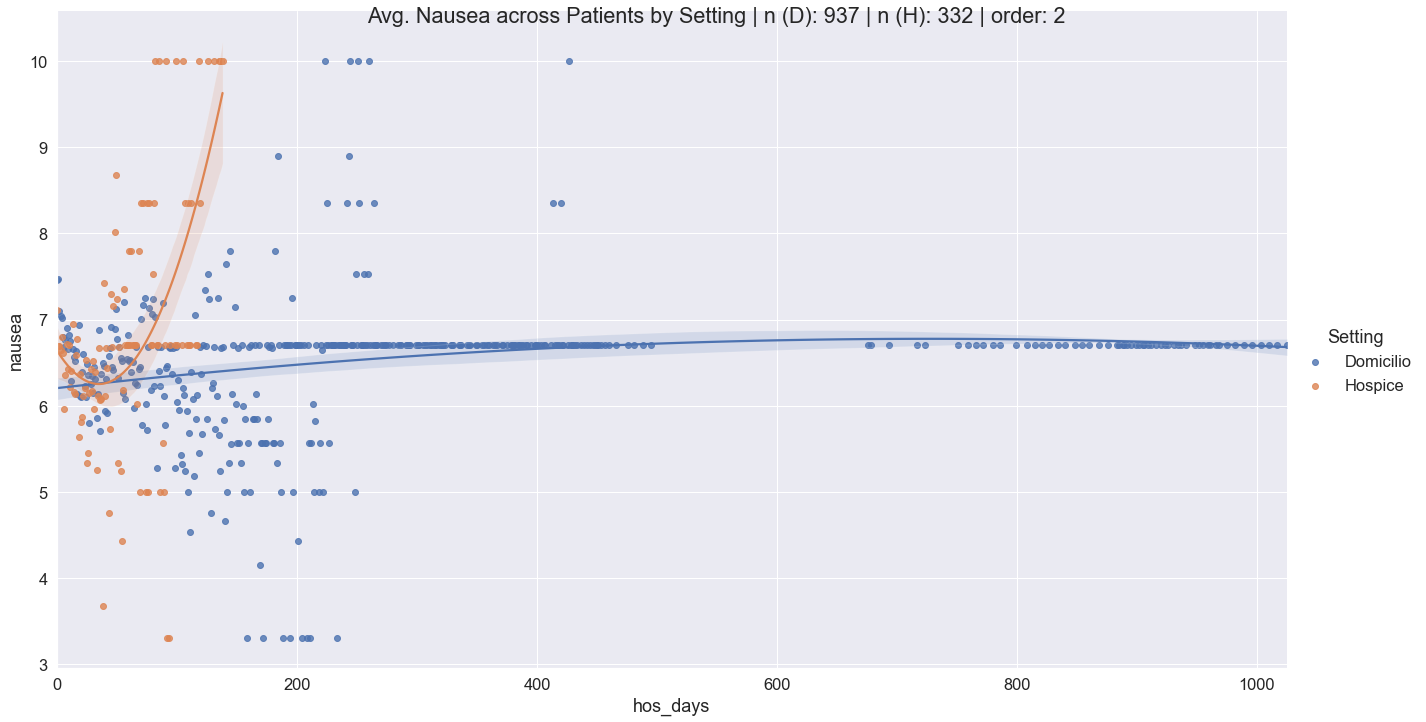

In [153]:
d_num = len(df_st[df_st['Setting'] == 'Domicilio'].IDEHR.unique())
h_num = len(df_st[df_st['Setting'] == 'Hospice'].IDEHR.unique())
sns.lmplot(x='hos_days', y='nausea', hue='Setting', data=df_n4, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 2')

Text(0.5, 0.98, 'Avg. Nausea across Patients by Setting | n (D): 937 | n (H): 332 | order: 2')

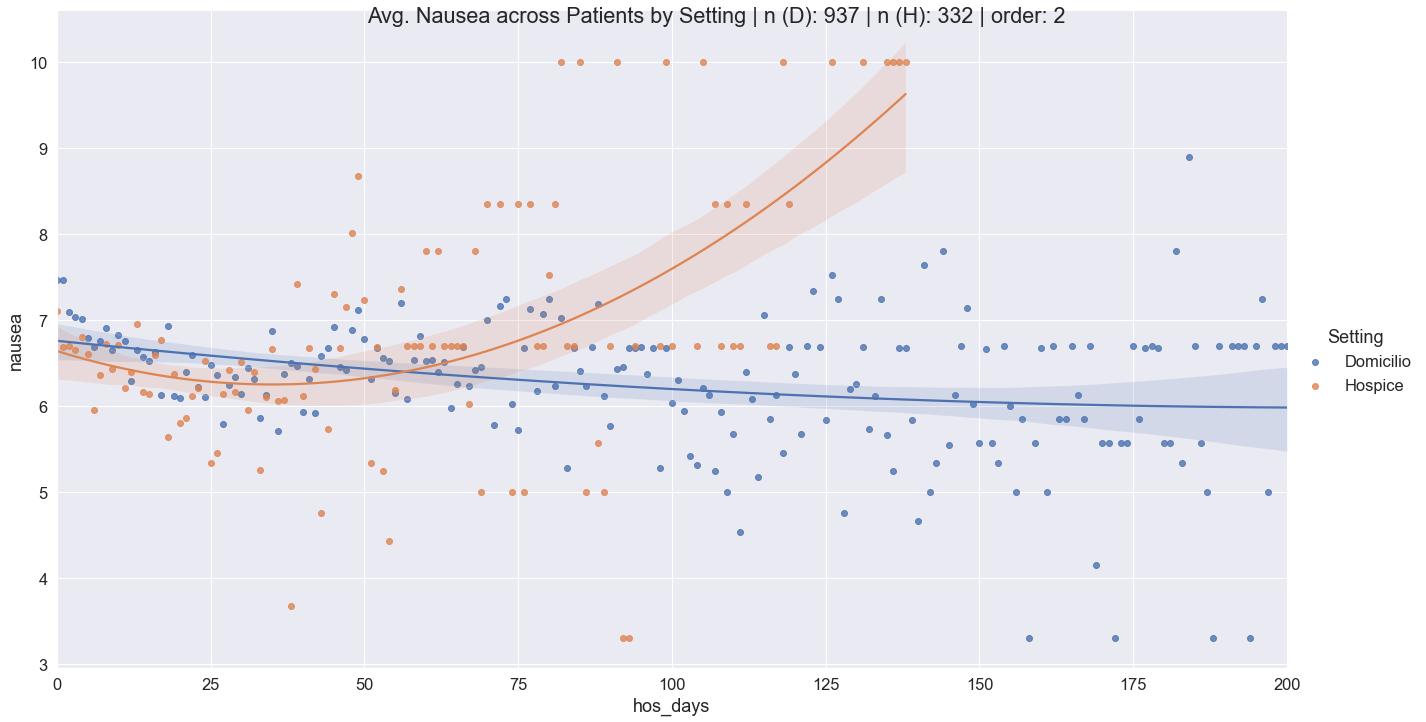

In [154]:
# Setting for only first 200 days
df_n5 = df_n4[df_n4['hos_days'] <= 200]
sns.lmplot(x='hos_days', y='nausea', hue='Setting', data=df_n5, order=2, height=10, aspect=1.8).fig.suptitle('Avg. Nausea across Patients by Setting | n (D): ' + str(d_num) + ' | n (H): ' + str(h_num) + ' | order: 2')

In [155]:
# heatmaps of avg nausea across diagnosis
df_n6 = df_na[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= 90]
p_num = len(df_na[df_na['hos_days'] <= 90].IDEHR.unique())
df_n6 = df_n6.pivot(index='Diagnosis', columns='hos_days', values='nausea')
df_n6

hos_days,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc,7.642857,6.975000,8.020000,8.114286,7.171429,7.800000,5.837500,8.350000,7.800000,7.500000,...,NaN,NaN,NaN,NaN,NaN,3.3,NaN,3.30,3.30,NaN
Breast,7.903333,7.467647,7.127273,6.541667,5.841667,6.676000,6.453333,7.518750,6.355000,6.677778,...,NaN,NaN,6.70,NaN,NaN,7.8,6.700,NaN,NaN,6.700000
Cervical-Ovarian,7.187179,6.920000,7.084848,6.546154,6.425926,6.300000,6.529167,7.113043,6.505263,6.838095,...,5.566667,8.35,3.30,7.800000,NaN,3.3,6.700,6.70,NaN,3.300000
GI Tract,7.259770,7.338235,6.684000,6.962500,6.887500,6.438889,6.416000,6.627586,6.604762,6.223529,...,7.800000,6.70,5.85,7.525000,8.350000,6.7,6.680,6.70,6.68,6.700000
Genitourinary,7.736842,7.330769,7.171429,7.690000,7.350000,6.442857,6.691667,6.893750,7.171429,7.525000,...,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,10.00,3.30,NaN
Head-Neck,7.525000,6.700000,6.685714,5.340000,5.000000,6.680000,7.800000,3.300000,5.980000,7.766667,...,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,10.00,10.00,NaN
Liver-Biliary,7.017500,7.200000,6.816000,7.212000,6.800000,7.031579,5.903846,6.305556,6.226667,6.981818,...,3.300000,6.70,6.70,NaN,5.566667,NaN,6.700,3.30,6.70,NaN
Lung,6.801754,6.820000,6.929268,6.568966,6.564286,6.580645,6.391176,5.744000,7.051852,6.962500,...,6.700000,6.70,6.70,6.700000,6.700000,6.7,6.700,6.70,6.70,6.700000
Lymphoid_Leukemia,NaN,7.800000,NaN,6.700000,6.700000,6.700000,6.700000,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.70,NaN,NaN


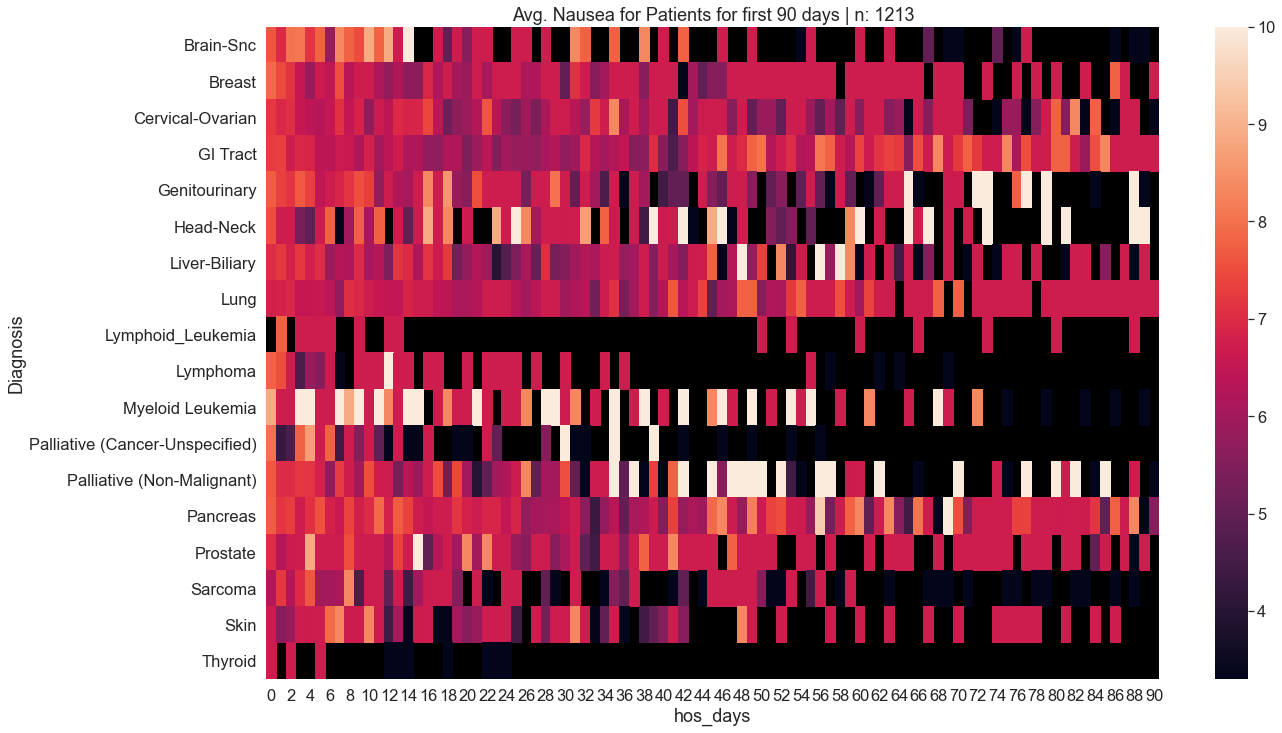

In [156]:
ax = plt.axes()
sns.heatmap(df_n6, annot=False, fmt='g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Nausea for Patients for first 90 days | n: ' + str(p_num))
plt.show()

In [157]:
# heatmaps of avg nausea across diagnosis
df_n6 = df_na[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= 30]
p_num = len(df_na[df_na['hos_days'] <= 30].IDEHR.unique())
df_n6 = df_n6.pivot(index='Diagnosis', columns='hos_days', values='nausea')
df_n6

hos_days,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc,7.642857,6.975000,8.020000,8.114286,7.171429,7.800000,5.837500,8.350000,7.800000,7.500000,...,6.700000,6.700000,NaN,NaN,6.700000,6.700000,NaN,6.700000,NaN,NaN
Breast,7.903333,7.467647,7.127273,6.541667,5.841667,6.676000,6.453333,7.518750,6.355000,6.677778,...,6.685714,6.072727,6.680000,6.700000,6.700000,6.133333,6.200000,6.700000,6.700000,5.000000
Cervical-Ovarian,7.187179,6.920000,7.084848,6.546154,6.425926,6.300000,6.529167,7.113043,6.505263,6.838095,...,6.240000,7.600000,6.372727,5.680000,5.340000,5.944444,5.412500,6.125000,6.700000,6.677778
GI Tract,7.259770,7.338235,6.684000,6.962500,6.887500,6.438889,6.416000,6.627586,6.604762,6.223529,...,5.891176,6.365625,5.505000,6.034615,5.837500,5.845000,5.776923,6.100000,6.252174,5.744444
Genitourinary,7.736842,7.330769,7.171429,7.690000,7.350000,6.442857,6.691667,6.893750,7.171429,7.525000,...,7.525000,6.700000,6.700000,6.700000,6.700000,5.340000,6.700000,6.700000,8.020000,6.700000
Head-Neck,7.525000,6.700000,6.685714,5.340000,5.000000,6.680000,7.800000,3.300000,5.980000,7.766667,...,NaN,NaN,8.900000,6.700000,10.000000,8.350000,6.020000,6.700000,6.700000,6.666667
Liver-Biliary,7.017500,7.200000,6.816000,7.212000,6.800000,7.031579,5.903846,6.305556,6.226667,6.981818,...,6.250000,5.964286,3.980000,4.757143,5.425000,6.133333,5.127273,7.044444,5.320000,5.550000
Lung,6.801754,6.820000,6.929268,6.568966,6.564286,6.580645,6.391176,5.744000,7.051852,6.962500,...,6.262500,6.700000,6.681818,6.690000,6.350000,6.010000,6.381818,6.677778,6.685714,5.944444
Lymphoid_Leukemia,NaN,7.800000,NaN,6.700000,6.700000,6.700000,6.700000,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


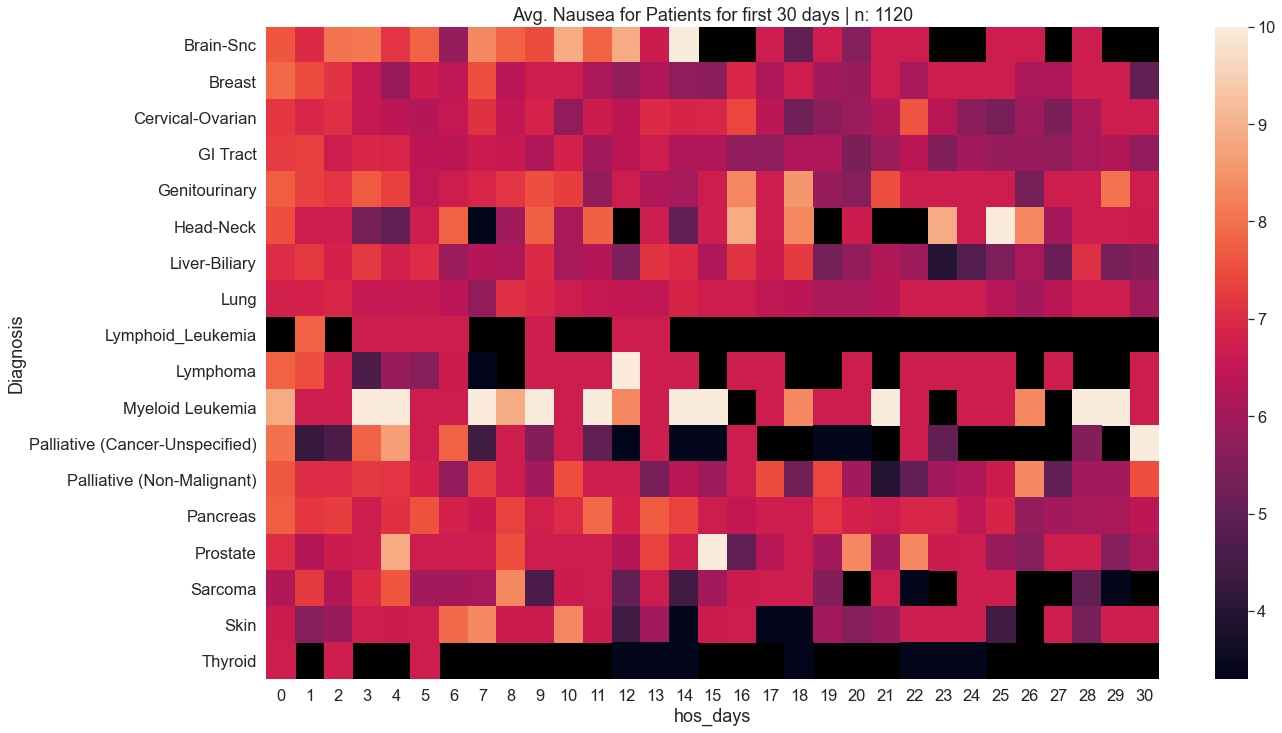

In [158]:
ax = plt.axes()
sns.heatmap(df_n6, annot=False, fmt='.1g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Nausea for Patients for first 30 days | n: ' + str(p_num))
plt.show()

In [159]:
# heatmaps for patients surviving atleast x days
s_time = 30
df_n6 = df_na[df_na['survival_time_days'] >= 30 ]
df_n6 = df_n6[df_n6['hos_days'] <= 30]
p_num = len(df_n6.IDEHR.unique())
df_n6 = df_n6[['Diagnosis', 'hos_days', 'nausea']].groupby(by=['Diagnosis', 'hos_days']).mean().reset_index()
df_n6 = df_n6[df_n6['hos_days'] <= 30]
df_n6 = df_n6.pivot(index='Diagnosis', columns='hos_days', values='nausea')
df_n6

hos_days,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,30
Diagnosis,,,,,,,,,,,,,,,,,,,,,
Brain-Snc,7.800000,6.700000,6.700000,NaN,6.700000,10.000000,3.300000,10.000000,NaN,NaN,...,NaN,6.700000,NaN,NaN,6.700000,6.700000,NaN,6.700000,NaN,NaN
Breast,7.290909,6.360000,7.800000,6.700000,6.700000,7.422222,6.687500,7.250000,6.700000,5.566667,...,6.700000,6.214286,5.850000,6.700000,6.700000,6.133333,6.200000,6.700000,6.700000,5.000000
Cervical-Ovarian,7.055556,7.512500,8.114286,7.233333,7.250000,10.000000,8.585714,8.114286,7.360000,8.350000,...,6.683333,6.700000,7.100000,5.728571,5.566667,6.700000,5.000000,6.381818,6.700000,6.677778
GI Tract,6.937037,7.224000,6.015000,6.695238,6.442857,6.686957,6.207143,7.000000,6.488235,6.209524,...,5.618182,6.296154,5.786667,5.675000,6.020000,5.894118,5.608000,6.161538,6.252174,5.744444
Genitourinary,8.020000,6.975000,6.700000,6.700000,6.700000,6.700000,6.700000,7.171429,6.700000,NaN,...,7.525000,6.700000,6.700000,6.700000,6.700000,5.340000,6.700000,6.700000,8.020000,6.700000
Head-Neck,6.700000,6.700000,5.000000,5.000000,NaN,8.350000,6.700000,3.300000,5.533333,10.000000,...,NaN,NaN,8.350000,6.700000,10.000000,6.700000,6.020000,6.700000,6.700000,6.666667
Liver-Biliary,6.687500,7.525000,6.700000,7.500000,6.000000,6.666667,6.020000,6.675000,6.116667,5.825000,...,6.671429,5.566667,3.300000,5.000000,4.660000,5.850000,4.640000,6.116667,5.320000,5.550000
Lung,7.215789,7.200000,6.416667,6.700000,6.214286,6.684615,6.020000,5.728571,7.525000,6.681818,...,6.063636,6.700000,6.681818,6.688889,6.311111,6.010000,6.381818,6.677778,6.685714,5.944444
Lymphoid_Leukemia,NaN,NaN,NaN,NaN,NaN,6.700000,NaN,NaN,NaN,6.700000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


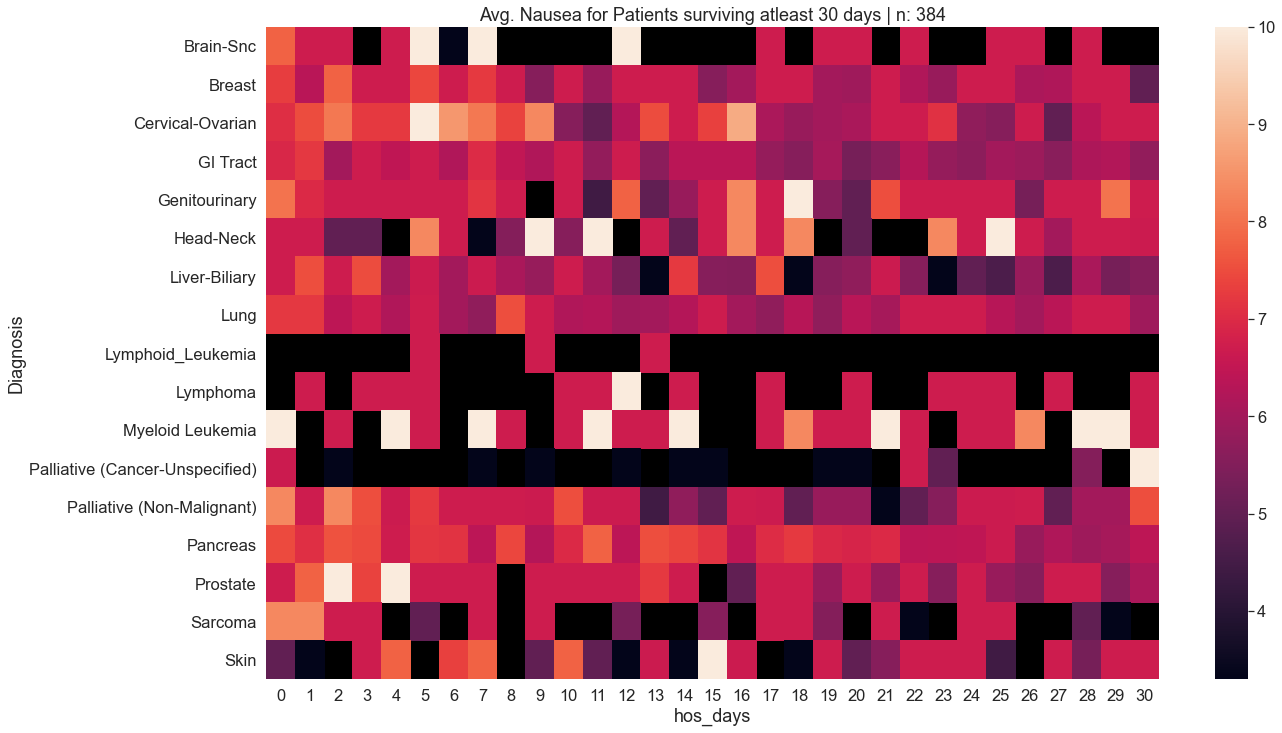

In [160]:
ax = plt.axes()
sns.heatmap(df_n6, annot=False, fmt='.1g', ax=ax)
ax.set_facecolor('xkcd:black')
ax.set_title('Avg. Nausea for Patients surviving atleast 30 days | n: ' + str(p_num))
plt.show()